# ***Telecom Churn Case Study***

### Submitted by : 
- Vipin Suresh T (DS C65) 
- Shubham Kapur (DS C65)
- Vishal Tyagi (DS C65)

## **Problem Statement**

#### ***Business problem overview***<br>
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.**

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

#### ***Understanding and defining churn***<br>
There are two main models of payment in the telecom industry - **`postpaid`** (customers pay a monthly/annual bill after using the services) and **`prepaid`** (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

*This project is based on the Indian and Southeast Asian market.*

 

#### ***Definitions of churn***<br>
There are various ways to define churn, such as:

**`Revenue-based churn`**: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

**`Usage-based churn`**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the **`usage-based definition`** to define churn.

 

#### ***High-value churn***<br>
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

#### ***Understanding the business objective and the data***<br>
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

#### ***Understanding customer behaviour during churn***
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are **`three phases of customer lifecycle`** :

- The ***`‘good’`*** phase: In this phase, the customer is happy with the service and behaves as usual.

- The ***`‘action’`*** phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- The ***`‘churn’`*** phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after **`tagging churn as 1/0 based on this phase`**, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### Model Building Work Flow followed :

- Import required libraries, Read data, view data, info, describe
- Data preparation - removing redundant columns, handling missing values, filtering high value customers (target customer segment), tagging churners.
- Exploratory data analysis (EDA),
- Data imbalance handling by SMOTE oversampling
- Logistic regression, future selection using RFE and VIF check, Prediction and evaluation Metrics, Feature importance
- Decision tree , evaluation Metrics
- Random forests, evaluation Metrics, Feature importance
- Comparison of models
- Insights and recommendations models

### Importing Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas EDA tool
# import pandas_profiling as pp
# from pandas_profiling import ProfileReport

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### Importing the Dataset

In [2]:
# Reading the csv data file.
telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Displaying the first 5 field with all columns in the dataset
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Checking the dimensions of the dataset
telecom.shape

(99999, 226)

In [5]:
# Checking the informations regarding the dataset
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
# Statistical analysis of the numercial features
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


# ___DATA PREPARATION___

### Now, looking at the data, there are certain fields which can be dropped immediately :
- mobile_number & cicle_ID - Every raw contains unique vlues in these columns.
- last_date_of_month - This does not help in the analysis. This is not a useful information.
- If there are any columns with only one unique value, those caluns can also dropped.

In [7]:
# We will drop the 'mobile_number' & 'cicle_ID' columns as these will not contribute further to our analysis.

telecom.drop(['mobile_number', 'circle_id'],axis = 1, inplace=True)

#### ___Drop Mobile No and Circle ID columns :___

#### ___Drop 'last_date_of_month' columns :___

In [8]:
# Drop 'last_date_of_month' columns :

last_date = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']
telecom.drop(last_date,axis = 1, inplace=True)

#### ___Drop 'single unique value' columns :___

In [9]:
# Locating columns with only one unique value:
telecom.nunique()

loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou_6            13539
loc_og_t2t_mou_7            13411
loc_og_t2t_mou_8            13336
loc_og_t2t_mou_9            12949
loc_og_t2m_mou_6            20905
loc_og_t2m_mou_7            20637
loc_og_t2m_mou

In [10]:
single_unique = telecom.columns[telecom.nunique() == 1].tolist()
single_unique

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [11]:
# drop columns whish are having 1 unique values
telecom.drop(columns=single_unique,inplace=True)

In [12]:
telecom.shape

(99999, 209)

**we can see that the columns with datetime values represented as object, they can be converted into datetime format**

In [13]:
# selecting all the columns with datetime format
date_col= telecom.select_dtypes(include=['object'])

# Converting the selected columns to datetime format
for i in date_col.columns:
    telecom[i] = pd.to_datetime(telecom[i])

In [14]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 209 entries, arpu_6 to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(33)
memory usage: 159.5 MB


### Renaming columns

- We can see there are 4 columns with a different naming method, which are jun_vbc_3g, jul_vbc_3g, aug_vbc_3g, sep_vbc_3g
- Let us rename the columns in the way other features are named :

In [15]:
telecom.rename(columns={
    'jun_vbc_3g': 'vbc_3g_6',
    'jul_vbc_3g': 'vbc_3g_7',
    'aug_vbc_3g': 'vbc_3g_8',
    'sep_vbc_3g': 'vbc_3g_9'
}, inplace=True)

In [16]:
telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,NaT,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.2

#### Checking for redundant columns :
#### Checking if the loc_og_mou_* is a sum of other columns t2t,t2m,t2f,t2c,t2o

In [17]:
telecom[['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6']].head()

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6
0,NaN,NaN,NaN,NaN,NaN
1,23.88,11.51,0.00,0.0,35.39
2,7.19,29.34,24.11,0.0,60.66
3,73.68,107.43,1.91,0.0,183.03
4,50.31,67.64,0.00,0.0,117.96


#### We can see that the last column is a ___sum___ of the first 2 columns.
#### Similary, total_ic_mou and total_og_mou are ___sum___ of corresponding loc, std, isd, spl and others
### Keeping the original granular information, the ___sum columns can be dropped___.

In [18]:
# List of columns to be dropped:
# ( We will maintain total_ic and total_og columns for 9th month since we need it later for deciding churners
sum_cols = ['loc_ic_mou_6'  ,  'std_ic_mou_6'  ,  'total_ic_mou_6'  ,  
            'loc_og_mou_6'  ,  'std_og_mou_6'  ,  'total_og_mou_6'  ,  
            'loc_ic_mou_7'  ,  'std_ic_mou_7'  ,  'total_ic_mou_7'  ,  
            'loc_og_mou_7'  ,  'std_og_mou_7'  ,  'total_og_mou_7'  ,  
            'loc_ic_mou_8'  ,  'std_ic_mou_8'  ,  'total_ic_mou_8'  ,  
            'loc_og_mou_8'  ,  'std_og_mou_8'  ,  'total_og_mou_8'  ,
            'loc_ic_mou_9'  ,  'std_ic_mou_9'  ,    
            'loc_og_mou_9'  ,  'std_og_mou_9'  ]

#  dropping these 24 columns
telecom.drop(sum_cols, axis=1, inplace=True)

In [19]:
telecom.shape

(99999, 187)

## Handling missing values

In [20]:
# Calculate the percentage of missing values for each column
null_percentage = (telecom.isnull().sum() / telecom.shape[0]) * 100

# Filter to display only the columns with missing values
missing_cols = null_percentage[null_percentage > 0].round(2).sort_values(ascending=False)
print(missing_cols)

date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
count_rech_3g_6             74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
max_rech_data_6             74.85
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
count_rech_2g_7             74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
fb_user_7                   74.43
date_of_last_rech_data_7    74.43
count_rech_3g_9             74.08
count_rech_2g_9             74.08
av_rech_amt_data_9          74.08
arpu_3g_9                   74.08
fb_user_9                   74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
arpu_2g_9     

In [21]:
# Count the number of columns with missing values
missing_columns_count = missing_cols.shape[0]
print(f"Number of columns with missing values: {missing_columns_count}")

Number of columns with missing values: 136


- If a customer did not recharge, the value assigned as NaN, hence we __should not__ drop these values blindly.
- For Example,  When a customer do not recharge,values under 'total_rech_data_*'  and 'date_of_last_rech_data_*' are assigned null. Hence __Total Recharge data, Maximum Recharge Data__ and __Average Amount recharge Data__  in month 6,7,8,9 can have false null values
- Hence the NULL in these columns __should not__ be dropped and we will impute with __zero__ .

In [22]:
# Columns which we have to impute as Zero.
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

Missing values in the below columns are imputed with zeros.<br>
- Total Recharge data in month 6,7,8,9 
- Maximum Recharge Data in Month 6,7,8 ,9
- Average Amount recharge Data in Month 6,7,8,9,


In [23]:
# Calculate the percentage of missing values for each column
null_percentage = (telecom.isnull().sum() / telecom.shape[0]) * 100

# Filter to display only the columns with missing values
missing_cols = null_percentage[null_percentage > 0].round(2).sort_values(ascending=False)
print(missing_cols)

count_rech_2g_6             74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
fb_user_6                   74.85
arpu_3g_6                   74.85
night_pck_user_6            74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
fb_user_7                   74.43
arpu_3g_7                   74.43
count_rech_3g_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
arpu_2g_7                   74.43
arpu_3g_9                   74.08
fb_user_9                   74.08
count_rech_2g_9             74.08
arpu_2g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
count_rech_3g_9             74.08
count_rech_3g_8             73.66
date_of_last_rech_data_8    73.66
count_rech_2g_8             73.66
arpu_3g_8                   73.66
arpu_2g_8                   73.66
night_pck_user_8            73.66
fb_user_8                   73.66
loc_og_t2m_mou_9             7.75
loc_og_t2t_mou

In [24]:
missing_columns_count = missing_cols.shape[0]
print(f"Number of columns with missing values: {missing_columns_count}")

Number of columns with missing values: 124


- __Night pack user__ columns and __FB User columns__ seem to be __categorical column__ as they have only 2 unique values:  

In [25]:
cat_cols = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6", "fb_user_7", "fb_user_8","fb_user_9"]

In [26]:
# Checking the count of unique values in these categorical columns:
for col in cat_cols :
    print ( col , "  :  ", telecom[col].nunique(), '   unique values')

night_pck_user_6   :   2    unique values
night_pck_user_7   :   2    unique values
night_pck_user_8   :   2    unique values
night_pck_user_9   :   2    unique values
fb_user_6   :   2    unique values
fb_user_7   :   2    unique values
fb_user_8   :   2    unique values
fb_user_9   :   2    unique values


In [27]:
# Checking the unique values in these categorical columns:
for col in cat_cols :
    print ( col , "  :  ", telecom[col].unique())

night_pck_user_6   :   [ 0. nan  1.]
night_pck_user_7   :   [ 0. nan  1.]
night_pck_user_8   :   [ 0. nan  1.]
night_pck_user_9   :   [nan  0.  1.]
fb_user_6   :   [ 1. nan  0.]
fb_user_7   :   [ 1. nan  0.]
fb_user_8   :   [ 1. nan  0.]
fb_user_9   :   [nan  1.  0.]


- Since ___1___ indicates those who are using the service and ___0___ indicates those who are not using the service, we are not sure now what the missing values indicate. 
-  __So, in the above columns,We can impute the NaN as  -1, as a part to mark as missing value.__

In [28]:
#Fill NaN value as -1 to mark missing value
telecom[cat_cols] = telecom[cat_cols].fillna(-1)

In [29]:
# Checking the unique values in these categorical columns:
for col in cat_cols :
    print ( col , "  :  ", telecom[col].unique())

night_pck_user_6   :   [ 0. -1.  1.]
night_pck_user_7   :   [ 0. -1.  1.]
night_pck_user_8   :   [ 0. -1.  1.]
night_pck_user_9   :   [-1.  0.  1.]
fb_user_6   :   [ 1. -1.  0.]
fb_user_7   :   [ 1. -1.  0.]
fb_user_8   :   [ 1. -1.  0.]
fb_user_9   :   [-1.  1.  0.]


In [30]:
# Check if there are any null values :
telecom[cat_cols].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [31]:
# Calculate the percentage of missing values for each column
null_percentage = (telecom.isnull().sum() / telecom.shape[0]) * 100

# Filter to display only the columns with missing values
missing_cols = null_percentage[null_percentage > 0].round(2).sort_values(ascending=False)
print(missing_cols)

print ('-------------------------------------------------')

missing_columns_count = missing_cols.shape[0]
print(f"Number of columns with missing values: {missing_columns_count}")

date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
count_rech_2g_6             74.85
arpu_3g_6                   74.85
count_rech_3g_6             74.85
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
arpu_3g_7                   74.43
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
arpu_2g_9                   74.08
arpu_3g_9                   74.08
count_rech_3g_9             74.08
count_rech_3g_8             73.66
arpu_2g_8                   73.66
arpu_3g_8                   73.66
count_rech_2g_8             73.66
date_of_last_rech_data_8    73.66
std_og_t2t_mou_9             7.75
std_ic_t2f_mou_9             7.75
std_ic_t2m_mou_9             7.75
std_og_t2m_mou_9             7.75
std_ic_t2t_mou_9             7.75
loc_ic_t2f_mou_9             7.75
std_og_t2f_mou_9             7.75
loc_ic_t2m_mou_9             7.75
isd_og_mou_9                 7.75
loc_ic_t2t_mou

##### Many columns have more than 70% null values and we can see that these can be dropped without affecting the analysis
##### Drop columns where there are more than 70% null values

In [32]:
cols_to_drop = telecom.columns[telecom.isnull().mean() > 0.7].tolist()

In [33]:
cols_to_drop

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [34]:
len(cols_to_drop)

20

In [35]:
telecom = telecom.drop(cols_to_drop, axis= 1)

In [36]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 167 entries, arpu_6 to vbc_3g_9
dtypes: datetime64[ns](4), float64(130), int64(33)
memory usage: 127.4 MB


#### Since we have details of the columns 'total_rech_data_*' and 'max_rech_data_*' , we can drop 'date_of_last_rech_*'  as it has no significance to the data

In [37]:
# Dropping the columns related to datetime dtype from the dataset
telecom.drop(["date_of_last_rech_6","date_of_last_rech_7", "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)

### check the null value row wise.

In [38]:
telecom.isna().sum(axis=1).sort_values(ascending = False).head(30)

51296    92
47936    92
48177    92
48376    92
48474    92
48582    92
48651    92
48707    92
48740    92
48839    92
49153    92
49211    92
49582    92
49594    92
49651    92
49772    92
49857    92
49903    92
49909    92
49981    92
50006    92
48138    92
47786    92
45426    92
47739    92
45836    92
46033    92
46295    92
46515    92
46694    92
dtype: int64

- We have many rows having multiple null values. We are not dropping these and will fill these gradually

In [39]:
# Calculate the percentage of missing values for each column
null_percentage = (telecom.isnull().sum() / telecom.shape[0]) * 100

# Filter to display only the columns with missing values
missing_cols = null_percentage[null_percentage > 0].round(2).sort_values(ascending=False)
print(missing_cols)

print ('-------------------------------------------------')

missing_columns_count = missing_cols.shape[0]
print(f"Number of columns with missing values: {missing_columns_count}")

ic_others_9         7.75
roam_og_mou_9       7.75
std_og_t2m_mou_9    7.75
std_og_t2f_mou_9    7.75
loc_og_t2c_mou_9    7.75
isd_og_mou_9        7.75
spl_og_mou_9        7.75
loc_og_t2f_mou_9    7.75
og_others_9         7.75
loc_og_t2m_mou_9    7.75
loc_ic_t2t_mou_9    7.75
loc_ic_t2m_mou_9    7.75
loc_og_t2t_mou_9    7.75
loc_ic_t2f_mou_9    7.75
std_og_t2t_mou_9    7.75
std_ic_t2t_mou_9    7.75
offnet_mou_9        7.75
std_ic_t2m_mou_9    7.75
roam_ic_mou_9       7.75
onnet_mou_9         7.75
isd_ic_mou_9        7.75
std_ic_t2f_mou_9    7.75
spl_ic_mou_9        7.75
ic_others_8         5.38
std_og_t2f_mou_8    5.38
isd_ic_mou_8        5.38
spl_og_mou_8        5.38
spl_ic_mou_8        5.38
og_others_8         5.38
std_ic_t2t_mou_8    5.38
loc_ic_t2t_mou_8    5.38
std_ic_t2f_mou_8    5.38
loc_ic_t2m_mou_8    5.38
std_og_t2m_mou_8    5.38
std_ic_t2m_mou_8    5.38
loc_ic_t2f_mou_8    5.38
isd_og_mou_8        5.38
roam_ic_mou_8       5.38
offnet_mou_8        5.38
loc_og_t2t_mou_8    5.38


- Still we have null values in 112 columns.
- Most of the columns with missing values are related to __Minutes of Usage (MOU)__  
- As these values are not available, so we are __imputing those values as 0__ instead of iteratively imputing.

In [40]:
# Fill the NaN as zero.
telecom = telecom.fillna(0)

In [41]:
telecom.isna().sum()

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2t_mou_9      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7

In [42]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 163 entries, arpu_6 to vbc_3g_9
dtypes: float64(130), int64(33)
memory usage: 124.4 MB


- __Now thre is no null values in the data.__
- __We have retained all the 99999 rows of data.__
- __No of columns reduced to 161 from 226.__

## Filter High Value Customer
- We need to predict churn only for the high-value customers. 
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge
  amount in the first two months (the good phase).

###  Create derived columns to filter high value customer

#### Data Recharge for 2 moonths :

In [43]:
#Calculate total Data recharge amount--> Total Data Recharge * Average Amount of Data recharge
# Total Data recharge amount for Month 6 :
telecom["total_data_rech_amt_6"] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
# Total Data recharge amount for Month 7 :
telecom["total_data_rech_amt_7"] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7
# Total Data recharge amount for Month 8 :
telecom["total_data_rech_amt_8"] = telecom.total_rech_data_8 * telecom.av_rech_amt_data_8
# Total Data recharge amount for Month 9 :
telecom["total_data_rech_amt_9"] = telecom.total_rech_data_9 * telecom.av_rech_amt_data_9

#### Now that a new column is created, the old 2 columns become redundant and can be dropped:

In [44]:
telecom.drop(columns=['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 
                         'total_rech_data_6','total_rech_data_7', 'total_rech_data_8','total_rech_data_9'
                        ],inplace=True)

####  Talktime + data recharge Total amount :

In [45]:
#Calculate Total Amount recharge --> total talktime recharge amount + total data recharge amount :
telecom["total_recharge_amt_6"] = telecom.total_rech_amt_6 + telecom.total_data_rech_amt_6
telecom["total_recharge_amt_7"] = telecom.total_rech_amt_7 + telecom.total_data_rech_amt_7
telecom["total_recharge_amt_8"] = telecom.total_rech_amt_8 + telecom.total_data_rech_amt_8
telecom["total_recharge_amt_9"] = telecom.total_rech_amt_9 + telecom.total_data_rech_amt_9

#### Average Recharge Amount for 2 months

In [46]:
#Calculate Average amount of recharge of 6th and 7th month
telecom['average_amt_6_7'] = (telecom["total_recharge_amt_6"] + telecom["total_recharge_amt_7"])/2

In [47]:
# Check the 70th percentile of "average_amnt_6_7"
telecom['average_amt_6_7'].quantile(.70)

478.0

- __70th percentile of average amount recharge in 6th and 7th month comes as 478.0.__
- Now filter the data based on this value.

In [48]:
#filter based on 70th percentile .
telecom_hv = telecom[telecom["average_amt_6_7"]>= telecom["average_amt_6_7"].quantile(.70)]

In [49]:
#Delete the derived columns created in above step
telecom_hv.drop(columns=["total_recharge_amt_6","total_recharge_amt_7","total_recharge_amt_8", "total_recharge_amt_9",
                         "average_amt_6_7"],inplace=True)

In [50]:
telecom_hv.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,0.0
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.0,15.74,15.19,15.14,0.0,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,0.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0

In [51]:
telecom_hv.shape

(30001, 159)

- __Finally we have 30001 rows of high value customer data with 157 columns.__

## Tag churners and remove attributes of the churn phase

- Now we need to tag the churned customers (churn=1, else 0) based on the fourth month as follows: 

- __Those who have not made any calls (either incoming or outgoing) AND  have not used mobile internet even once in the churn
  phase.__
  
- Based on these below attributes we need to decide churners
    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9

In [52]:
#Calculate total call in mins by adding Incoming and Outgoing calls
telecom_hv['total_calls_9'] = telecom_hv.total_ic_mou_9 + telecom_hv.total_og_mou_9

In [53]:
# Calculate total 2G and 3G consumption of data
telecom_hv["total_data_consumptions"] = telecom_hv.vol_2g_mb_9 + telecom_hv.vol_3g_mb_9

- Create Churn variable. __Customer who have not used any calls AND have not consumed any data on month of 9 are tagged as Churn customer.__
- Churn customer is marked as __1__   &   non-churn custoner is marked as __0__ .

In [54]:
#Tag 1 as churner  where total_calls_9=0 and total_data_consumptions=0
# else 0 as non-churner
telecom_hv["churn"]=telecom_hv.apply(lambda row:1 if (row.total_calls_9==0 and row.total_data_consumptions==0) else 0,axis=1)

In [55]:
#check the percentages of churn and non churn data
round(telecom_hv["churn"].value_counts(normalize=True)*100,2)

churn
0    91.86
1     8.14
Name: proportion, dtype: float64

- __The data is imbalanced.__ 
- __Churn percentage is close 8 and non-churn percentage is close to 92.__

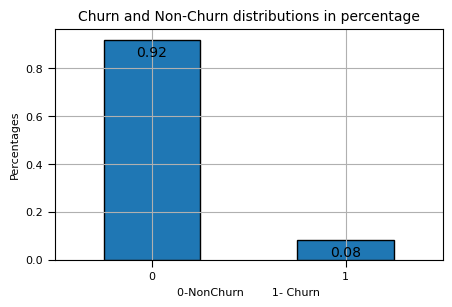

In [56]:
# plot to Check percetanges of churn and non churn data
plt.figure(figsize=(5,3))
ax = telecom_hv["churn"].value_counts(normalize=True).plot.bar(edgecolor='black')
plt.tick_params(size=5,labelsize = 8) 
plt.xticks(rotation=0)
plt.title("Churn and Non-Churn distributions in percentage",fontsize=10)
plt.ylabel("Percentages",fontsize=8)
plt.xlabel("0-NonChurn        1- Churn",fontsize=8)
plt.grid(0.3)

for p in ax.patches:
       ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top', fontsize=10, color='black', xytext=(0, -4),
                textcoords='offset points')
plt.show()

In [57]:
#Drop the derived columns
telecom_hv.drop(columns=["total_calls_9","total_data_consumptions"],inplace=True)

### Delete columns that belong to the 9th month : Churn Month
- After tagging churners, remove all the attributes corresponding to the churn phase 
(all attributes having ‘ _9’, etc. in their names.
- These columns  contain data for users, where these users are already churned.
- Hence those will not contribute anything to churn prediction.

In [58]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in telecom_hv.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_data_rech_amt_9']


In [59]:
len(churn_phase_cols)

41

In [60]:
# Dropping the selected churn phase columns
telecom_hv.drop(churn_phase_cols, axis=1, inplace=True)

In [61]:
# The curent dimension of the dataset after dropping the churn related columns
telecom_hv.shape

(30001, 119)

In [62]:
telecom_hv.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,154.0,23.0,0.00,356.00,0.03,0.00,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,720,0.00,0.

## Collinearity Check 

#### check the collineartity of the indepedent variables and try to understand their dependencies.

In [63]:
# creating a list of column names for each month
mon_6_cols = [col for col in telecom_hv.columns if '_6' in col]
mon_7_cols = [col for col in telecom_hv.columns if '_7' in col]
mon_8_cols = [col for col in telecom_hv.columns if '_8' in col]

In [64]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_hv_corr = telecom_hv.corr()

In [65]:
telecom_hv_corr.loc[:,:] = np.tril(telecom_hv_corr, k=-1)
telecom_hv_corr = telecom_hv_corr.stack()
telecom_hv_corr
telecom_hv_corr[(telecom_hv_corr > 0.80) | (telecom_hv_corr < -0.80)].sort_values(ascending=False)

fb_user_6         night_pck_user_6    0.956620
fb_user_7         night_pck_user_7    0.956322
total_rech_amt_8  arpu_8              0.955351
fb_user_8         night_pck_user_8    0.954831
total_rech_amt_6  arpu_6              0.946125
total_rech_amt_7  arpu_7              0.943588
isd_og_mou_8      isd_og_mou_7        0.943120
                  isd_og_mou_6        0.918187
isd_og_mou_7      isd_og_mou_6        0.915247
std_og_t2t_mou_8  onnet_mou_8         0.860668
std_og_t2t_mou_7  onnet_mou_7         0.860335
std_og_t2t_mou_6  onnet_mou_6         0.859409
std_og_t2m_mou_7  offnet_mou_7        0.854595
std_og_t2m_mou_8  offnet_mou_8        0.851078
loc_og_t2t_mou_8  loc_og_t2t_mou_7    0.833081
std_og_t2m_mou_6  offnet_mou_6        0.830354
loc_og_t2m_mou_8  loc_og_t2m_mou_7    0.823666
loc_ic_t2m_mou_8  loc_ic_t2m_mou_7    0.812493
loc_og_t2f_mou_7  loc_og_t2f_mou_6    0.809061
loc_ic_t2t_mou_8  loc_ic_t2t_mou_7    0.806793
onnet_mou_8       onnet_mou_7         0.806053
std_og_t2t_mo

In [66]:
col_to_drop = ['fb_user_6', 'fb_user_7', 'total_rech_amt_8', 'fb_user_8', 'total_rech_amt_6', 'total_rech_amt_7', 
               'isd_og_mou_8', 'isd_og_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_6', 
               'std_og_t2m_mou_7', 'std_og_t2m_mou_8']

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these 20 columns
telecom_hv.drop(col_to_drop, axis=1, inplace=True)

In [67]:
telecom_hv.shape

(30001, 106)

In [68]:
telecom_hv.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,49.89,6.66,20.08,16.68,0.0,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,13.69,0.00,0.00,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,154.0,23.0,0.00,356.00,0.03,0.00,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,665.36,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,2.36,0.00,0.00,0.00,0.0,0.1,0.0,17.71,0.0,0.0,0.0,20.71,61.04,76.64,95.91,113.36,146.84,0.00,0.00,0.71,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.0,179.0,179.0,0.00,0.48,0.01,0.00,599.09,1009.92,-1.0,

# Exploratory Data Analysis (EDA)

### Deriving new variables to understand the data

In [69]:
# Checking the columns head :
telecom_hv.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,49.89,6.66,20.08,16.68,0.0,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,13.69,0.00,0.00,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,154.0,23.0,0.00,356.00,0.03,0.00,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,665.36,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,2.36,0.00,0.00,0.00,0.0,0.1,0.0,17.71,0.0,0.0,0.0,20.71,61.04,76.64,95.91,113.36,146.84,0.00,0.00,0.71,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.0,179.0,179.0,0.00,0.48,0.01,0.00,599.09,1009.92,-1.0,

In [70]:
# We have a column called 'aon' which is the Age on Network in Days. 

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure' (number of months on network)
telecom_hv['tenure'] = (telecom_hv['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom_hv.drop('aon',axis=1, inplace=True)

In [71]:
telecom_hv.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn,tenure
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,252.0,252.0,252.0,1,32.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,49.89,6.66,20.08,16.68,0.0,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.0,0.0,0.0,1,27.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,13.69,0.00,0.00,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,154.0,23.0,0.00,356.00,0.03,0.00,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.0,354.0,207.0,0,10.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,665.36,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.0,0.0,0.0,0,24.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,2.36,0.00,0.00,0.00,0.0,0.1,0.0,17.71,0.0,0.0,0.0,20.71,61.04,76.64,95.91,113.36,146.84,0.00,0.00,0.71,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.0,179.0,179.0,0.00,0.48,0.01,0.00,599.09,1009.9

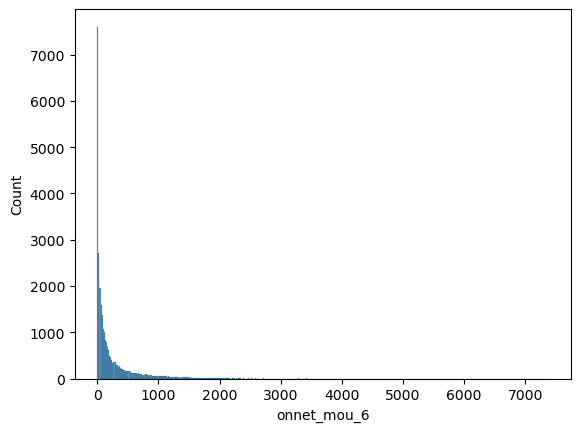

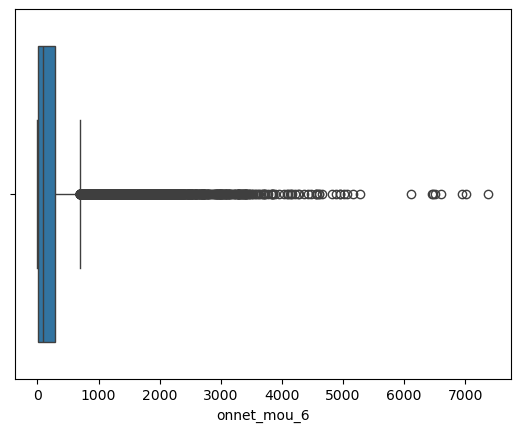

In [72]:
sns.histplot(data=telecom_hv,x='onnet_mou_6')
plt.show()
sns.boxplot(data=telecom_hv,x='onnet_mou_6')
plt.show()

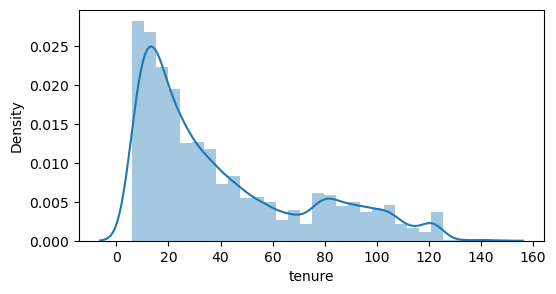

In [73]:
# Checking the distribution of the tenure variable
plt.figure(figsize=[6,3])
sns.distplot(telecom_hv['tenure'],bins=30)
plt.show()

In [74]:
# Creating tenure period buckets to understand behaviour pattern w.r.t tenure buckets:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_hv['tenure_range'] = pd.cut(telecom_hv['tenure'], tn_range, labels=tn_label)
telecom_hv['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

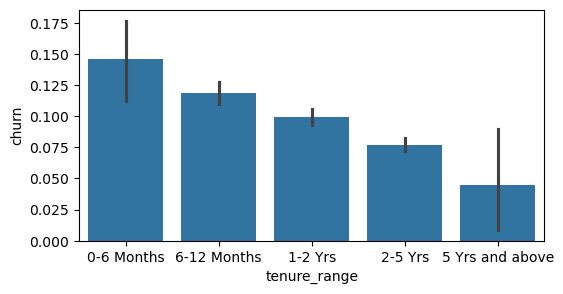

In [75]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[6,3])
sns.barplot(x='tenure_range',y='churn', data=telecom_hv)
plt.show()

**It can be seen that the maximum churn rate happens among customers with tenure 0-6 month, but it gradually decreases as the customer retains in the network.**

In [76]:
# Let us drop the column 'tenure_range' as we have understood the pattern and this column in object datatype will be a problem in further analysis
telecom_hv.drop('tenure_range', axis=1, inplace=True)

### Visualising average revenue per user(ARPU)

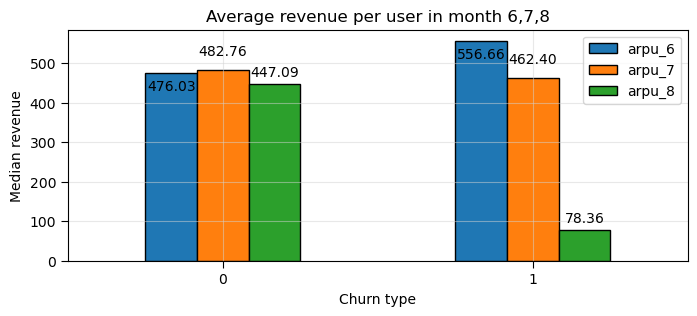

In [77]:
# Plot to visualize average revenue per user(ARPU)
ax = telecom_hv.groupby("churn")[["arpu_6","arpu_7","arpu_8"]].median().plot.bar(figsize=[8,3], edgecolor='black')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', fontsize=10, padding=-15)
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge', fontsize=10, padding=8)
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge', fontsize=10, padding=3)
plt.title("Average revenue per user in month 6,7,8",fontsize=12)
plt.tick_params(size=5,labelsize = 10) 
plt.ylabel("Median revenue",fontsize=10)
plt.xlabel("Churn type",fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, color='lightgrey', alpha=0.5)
plt.show()

#### Observation
- In case of 'Churn' category, Average revenue per user is seen to suddenly drop on month 8 compared to months 6 & 7.
- Average revenue is almost same for the 3 months in case of non-churn category.

### Visualising Minutes of usage inside network

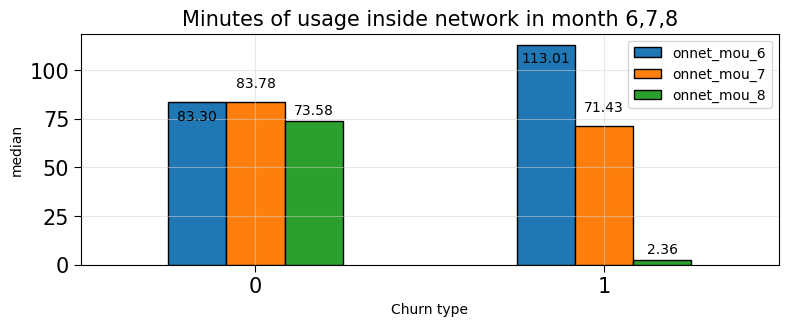

In [78]:
## Plot to visualize onnet_mou
ax = telecom_hv.groupby("churn")[["onnet_mou_6","onnet_mou_7","onnet_mou_8" ]].median().plot.bar(figsize=[9,3], edgecolor = 'black')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', fontsize=10, padding=-15)
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge', fontsize=10, padding=8)
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge', fontsize=10, padding=3)
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage inside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=10)
plt.xlabel("Churn type",fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, color='lightgrey', alpha=0.5)
plt.show()

 - __Users whose minutes of usage which show a reduction pattern over the months are more likely to churn.__ They are showing a decreasing trend in usage over months

### Visualising Minutes of usage Outside network (Offnet)

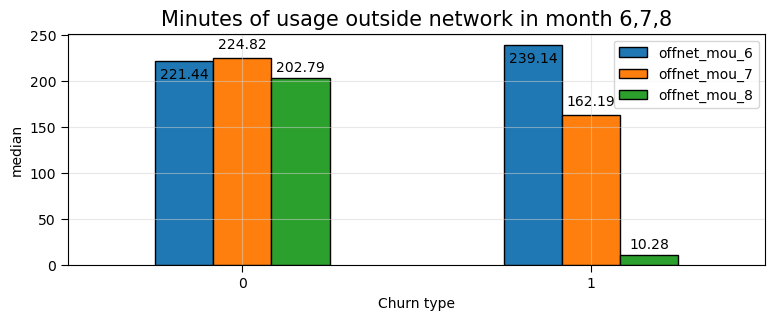

In [79]:
# Plot to visualize  offnet_mou
ax = telecom_hv.groupby("churn")[["offnet_mou_6","offnet_mou_7","offnet_mou_8" ]].median().plot.bar(figsize=[9,3], edgecolor = 'black')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', fontsize=10, padding=-15)
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge', fontsize=10, padding=5)
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge', fontsize=10, padding=3)
plt.tick_params(size=5,labelsize = 10) 
plt.title("Minutes of usage outside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=10)
plt.xlabel("Churn type",fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, color='lightgrey', alpha=0.5)
plt.show()

- __The users who have big difference of minutes of call duration  to other network between month 6 and month 7,are likely to churn.__ 

### Local calls OutGoing Within same network Mobile to mobile Minutes of Usage :

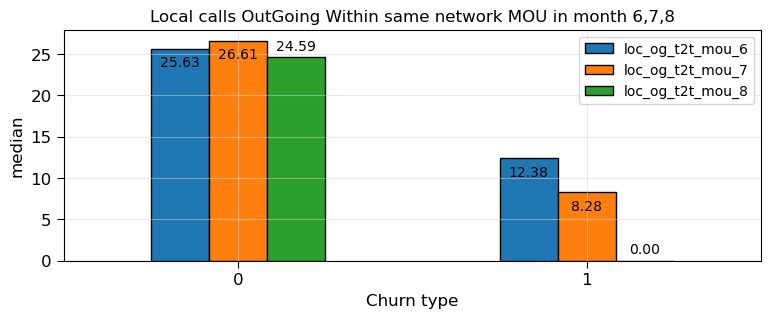

In [80]:
# Plot to visualize total_rech_amt
ax = telecom_hv.groupby("churn")[["loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8" ]].median().plot.bar(figsize=[9,3], edgecolor = 'black')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', fontsize=10, padding=-15)
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge', fontsize=10, padding=-15)
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge', fontsize=10, padding=3)
plt.tick_params(size=5,labelsize = 12) 
plt.title("Local calls OutGoing Within same network MOU in month 6,7,8",fontsize=12)
plt.ylabel("median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, color='lightgrey', alpha=0.5)
plt.show()

##### Observation :
- For the group which churned, there is a visible drop in Local calls usage from Month 6 to 7 and then sharp drop to 0 by month 8

### Local outgoing  minute to other operator

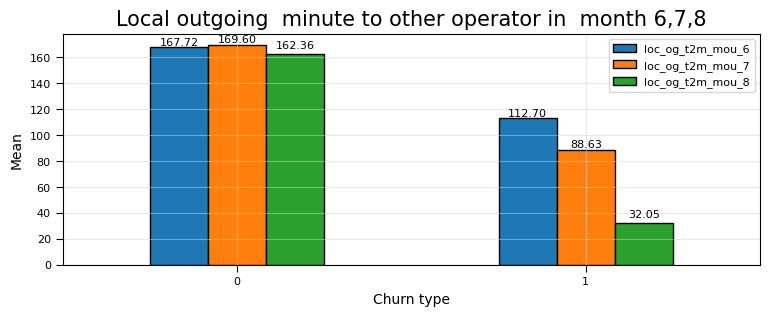

In [81]:
# Plot to visualize total_rech_data_
ax = telecom_hv.groupby("churn")[["loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8"]].mean().plot.bar(figsize=[9,3], edgecolor = 'black')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', fontsize=8, padding=0)
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge', fontsize=8, padding=0)
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge', fontsize=8, padding=3)
plt.tick_params(size=5,labelsize = 8)  
plt.title("Local outgoing  minute to other operator in  month 6,7,8",fontsize=15)
plt.ylabel("Mean",fontsize=10)
plt.xlabel("Churn type",fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, color='lightgrey', alpha=0.5)
plt.legend(loc='best', fontsize=8)
plt.show()

##### Observation :
- For the group which churned, there is a visible drop in Local calls usage over the months

### Total Data recharge Amount :

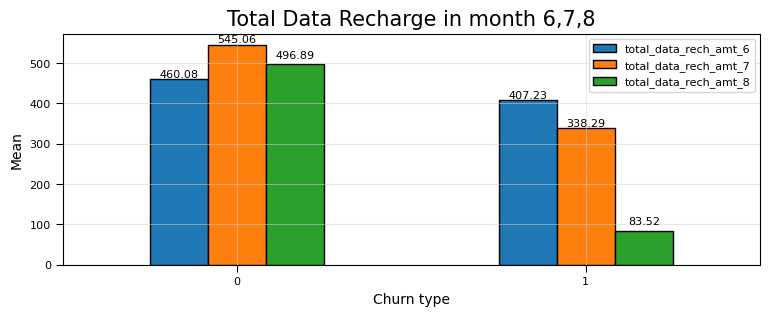

In [82]:
# Plot to visualize total_rech_data_
ax = telecom_hv.groupby("churn")[["total_data_rech_amt_6","total_data_rech_amt_7","total_data_rech_amt_8" ]].mean().plot.bar(figsize=[9,3], edgecolor = 'black')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', fontsize=8, padding=0)
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge', fontsize=8, padding=0)
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge', fontsize=8, padding=3)
plt.tick_params(size=5,labelsize = 8) 
plt.title("Total Data Recharge in month 6,7,8",fontsize=15)
plt.ylabel("Mean",fontsize=10)
plt.xlabel("Churn type",fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, color='lightgrey', alpha=0.5)
plt.legend(loc='best', fontsize=8)
plt.show()

#### Those who are about to churn are showing a gradual reduction over the months in case of data Recharge

### Roaming incoming Minutes of Usage Trend

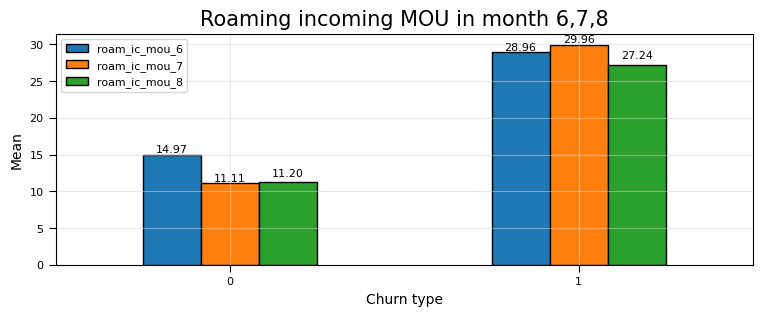

In [83]:
# Plot to visualize total_rech_data_
ax = telecom_hv.groupby("churn")[["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8" ]].mean().plot.bar(figsize=[9,3], edgecolor = 'black')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', fontsize=8, padding=0)
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge', fontsize=8, padding=0)
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge', fontsize=8, padding=3)
plt.tick_params(size=5,labelsize = 8) 
plt.title("Roaming incoming MOU in month 6,7,8",fontsize=15)
plt.ylabel("Mean",fontsize=10)
plt.xlabel("Churn type",fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, color='lightgrey', alpha=0.5)
plt.legend(loc='best', fontsize=8)
plt.show()

#### Observation :
##### Customers with higher Roaming (close to 30 min per month) are more prone to churn

### Roaming Outgoing Minutes of Usage Trend

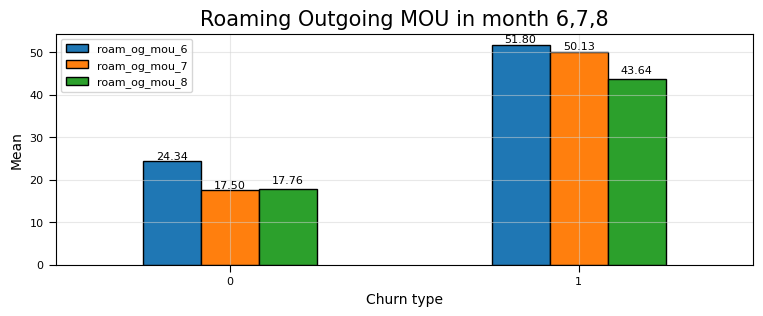

In [84]:
# Plot to visualize total_rech_data_
ax = telecom_hv.groupby("churn")[["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8" ]].mean().plot.bar(figsize=[9,3], edgecolor = 'black')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', fontsize=8, padding=0)
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge', fontsize=8, padding=0)
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge', fontsize=8, padding=3)
plt.tick_params(size=5,labelsize = 8) 
plt.title("Roaming Outgoing MOU in month 6,7,8",fontsize=15)
plt.ylabel("Mean",fontsize=10)
plt.xlabel("Churn type",fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, color='lightgrey', alpha=0.5)
plt.legend(loc='best', fontsize=8)
plt.show()

#### Observation :
##### Customers with higher Roaming outgoing (close to 50 min per month) are more prone to churn. 
##### It is possible that their travel pattern has changed and they may look to move to a different operator.

## Average Revenue Per User (ARPU)

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns.

In [85]:
telecom_hv["avg_arpu_6_7"]= (telecom_hv['arpu_6']+telecom_hv['arpu_7'])/2
telecom_hv['avg_arpu_6_7'].head()

0      206.1005
7     1209.5150
8      435.4720
21     556.1030
23     134.1235
Name: avg_arpu_6_7, dtype: float64

In [86]:
telecom_hv.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn,tenure,avg_arpu_6_7
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,252.0,252.0,252.0,1,32.0,206.1005
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,49.89,6.66,20.08,16.68,0.0,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.0,0.0,0.0,1,27.0,1209.5150
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,13.69,0.00,0.00,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,154.0,23.0,0.00,356.00,0.03,0.00,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.0,354.0,207.0,0,10.0,435.4720
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,665.36,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.0,0.0,0.0,0,24.0,556.1030
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,2.36,0.00,0.00,0.00,0.0,0.1,0.0,17.71,0.0,0.0,0.0,20.71,61.04,76.64,95.91,113.36,146.84,0.00,0.00,0.71,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0

In [87]:
# Drop the original columns as they are derived to a new column for better understanding of the data
telecom_hv.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

In [88]:
# The curent dimension of the dataset after dropping few unwanted columns
telecom_hv.shape

(30001, 105)

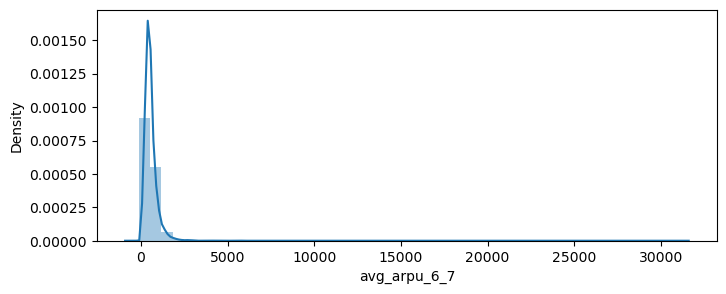

In [89]:
# Visualizing the column created
plt.figure(figsize=(8,3))
sns.distplot(telecom_hv['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

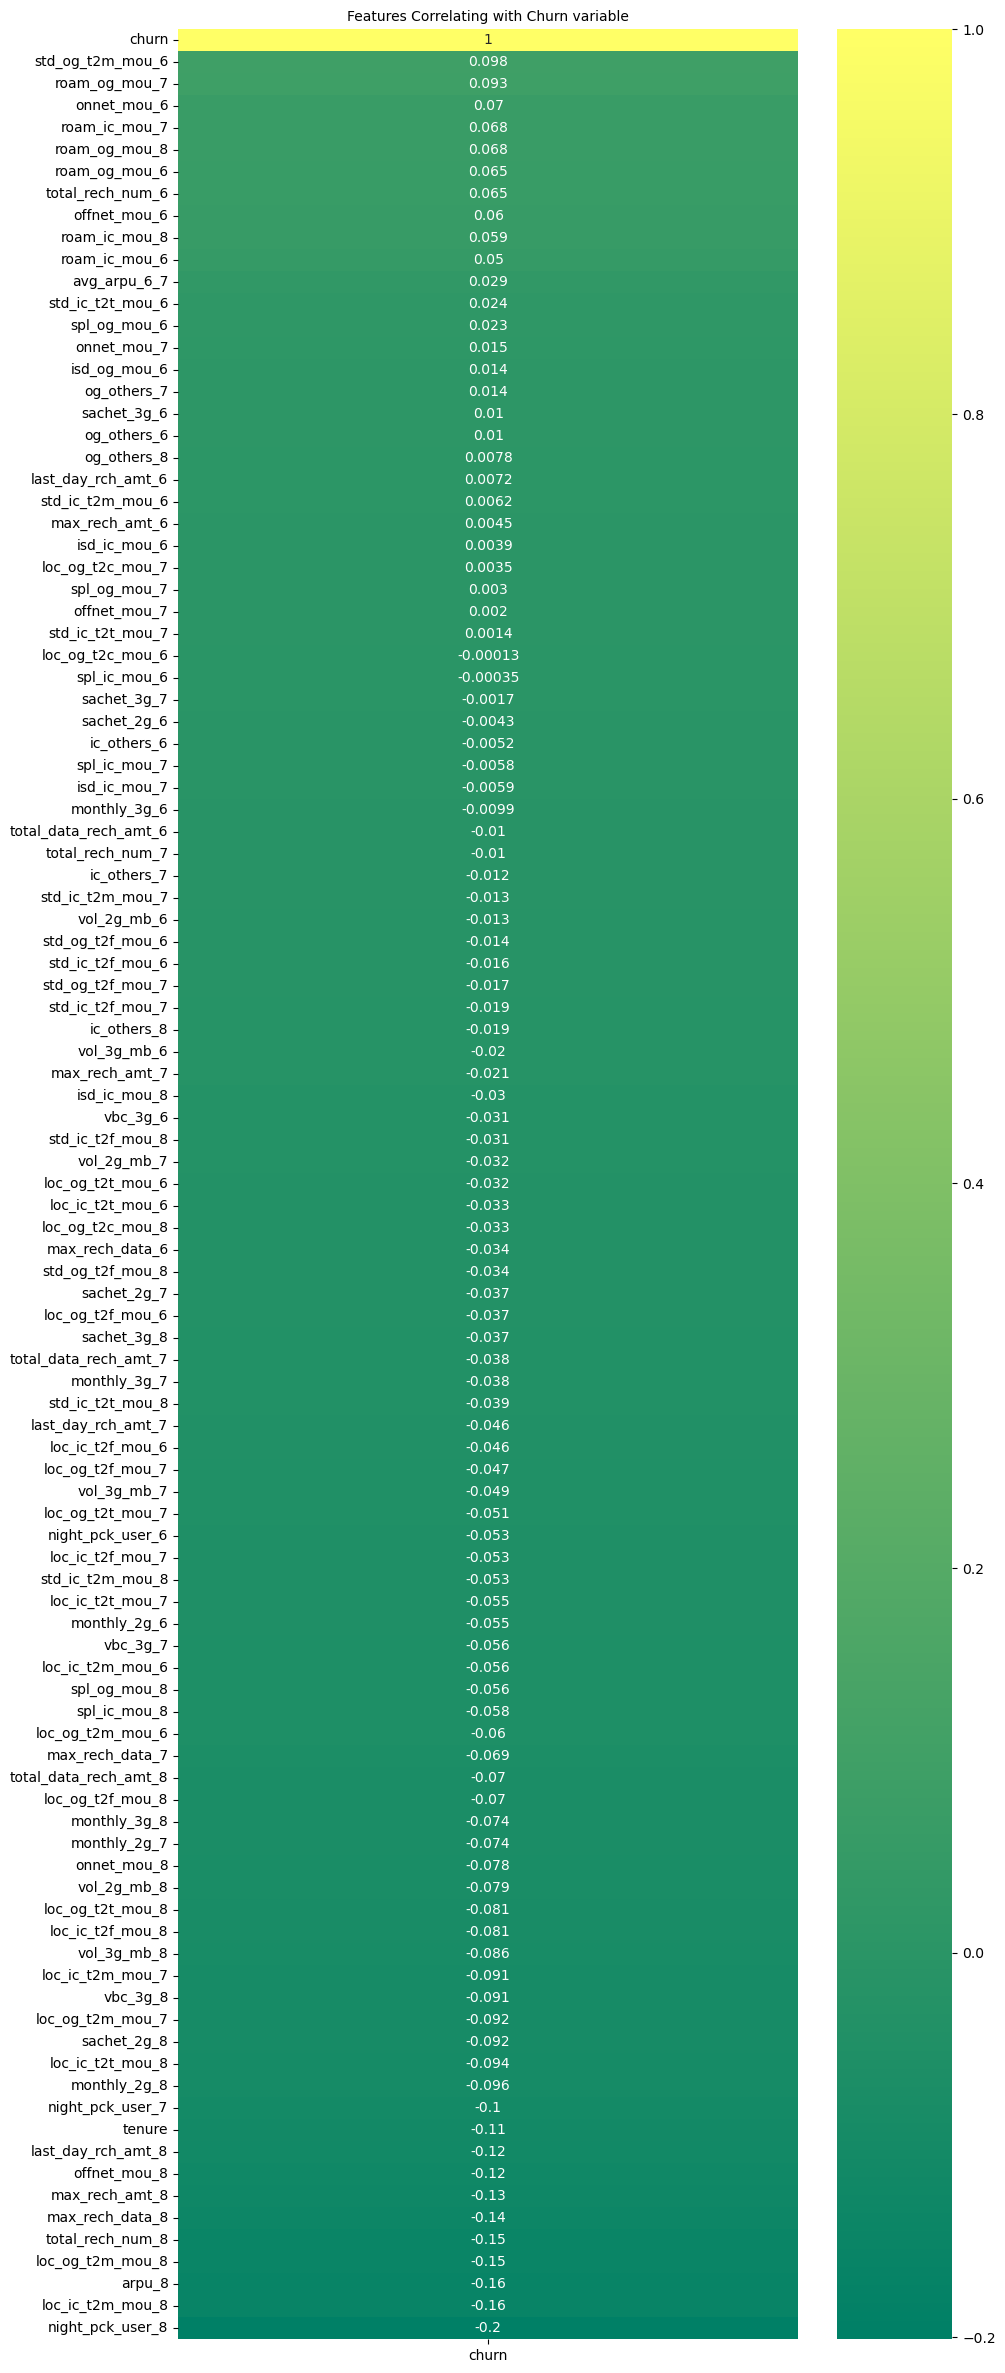

In [90]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,30))
heatmap_churn = sns.heatmap(telecom_hv.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=10)

#### Above plot shows the relation of the independant variables with the target variable. 
- A very weak relation is visible with various variables.
- Most of the variables in 6 & 7 months have a positive correlation with churn.
- That means if the variable value is more in week 6 & 7 (ie, value is less in week 8), posssibility of churn is more.

# Model Building

In [91]:
# Creating a copy of the filtered dataframe
df=telecom_hv[:].copy()

In [92]:
# Create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [93]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,tenure,avg_arpu_6_7
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,252.0,252.0,252.0,32.0,206.1005
7,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,49.89,6.66,20.08,16.68,0.0,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.0,0.0,0.0,27.0,1209.5150
8,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,13.69,0.00,0.00,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,154.0,23.0,0.00,356.00,0.03,0.00,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.0,354.0,207.0,10.0,435.4720
21,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,665.36,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.0,0.0,0.0,24.0,556.1030
23,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,2.36,0.00,0.00,0.00,0.0,0.1,0.0,17.71,0.0,0.0,0.0,20.71,61.04,76.64,95.91,113.36,146.84,0.00,0.00,0.71,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.0,179.0,179.0,0.00,0.48,0.01,0.00,599.09,1009.92,-1.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,40.45,51.86,0.00,0.0

In [94]:
# Create y dataset for model building.
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

### Train-Test Split

In [95]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 104)
Dimension of X_test: (9001, 104)


### Scaling

In [96]:
X_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 15709 to 99093
Data columns (total 104 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    arpu_8                 float64
 1    onnet_mou_6            float64
 2    onnet_mou_7            float64
 3    onnet_mou_8            float64
 4    offnet_mou_6           float64
 5    offnet_mou_7           float64
 6    offnet_mou_8           float64
 7    roam_ic_mou_6          float64
 8    roam_ic_mou_7          float64
 9    roam_ic_mou_8          float64
 10   roam_og_mou_6          float64
 11   roam_og_mou_7          float64
 12   roam_og_mou_8          float64
 13   loc_og_t2t_mou_6       float64
 14   loc_og_t2t_mou_7       float64
 15   loc_og_t2t_mou_8       float64
 16   loc_og_t2m_mou_6       float64
 17   loc_og_t2m_mou_7       float64
 18   loc_og_t2m_mou_8       float64
 19   loc_og_t2f_mou_6       float64
 20   loc_og_t2f_mou_7       float64
 21   loc_og_t2f_mou_8       float64
 22

In [97]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()
num_col

['arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mo

In [98]:
len(num_col)

104

In [99]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [100]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,tenure,avg_arpu_6_7
15709,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.099035,0.099035,0.099035,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.5,0.5,0.5,0.25,0.25,0.2,0.000000,0.041667,0.000000,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.001458,0.011111,0.001728,0.565217,0.063393
28202,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.040816,0.009227,0.009227,0.008316,0.009227,0.005985,0.005619,0.016077,0.016077,0.016077,0.064367,0.045634,0.035909,0.000332,0.000000,0.000000,0.5,0.5,0.5,0.00,0.00,0.0,0.166667,0.083333,0.176471,0.0,0.000000,0.0000,0.0,0.057143,0.0,0.000000,0.000000,0.0,0.007222,0.015142,0.009562,0.275362,0.068877
14943,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,0.0,0.00000,0.0,0.001004,0.000303,0.000714,0.006148,0.016108,0.014527,0.000000,0.000529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.016453,0.002701,0.000000,0.000000,0.0,0.0,0.000183,0.001511,0.010736,0.037515,0.033858,0.025755,0.000465,0.005804,0.019112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.022773,0.005157,0.0,0.000000,0.000000,0.000011,0.000000,0.0,0.000149,0.061889,0.108696,0.056122,0.006234,0.038404,0.004495,0.002494,0.038404,0.003147,0.016077,0.099035,0.009003,0.066259,0.090365,0.051188,0.000000,0.000000,0.000000,0.5,0.5,0.5,0.00,0.50,0.0,0.261905,0.020833,0.058824,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.018430,0.017702,0.000628,0.028986,

### Data Imbalance Handling

**Using ___Oversampling___ method, we can balance the data w.r.t. churn variable and proceed further**

In [101]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=48)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

  File "C:\Users\VIPIN\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\VIPIN\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VIPIN\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\VIPIN\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [102]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 104)
Dimension of y_train_sm Shape: (38576,)


## ***LOGISTIC REGRESSION***

In [103]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [104]:
# Logistic regression model
logm0 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38471
Model Family:                Binomial   Df Model:                          104
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 03 Oct 2024   Deviance:                       29195.
Time:                        16:34:14   Pearson chi2:                 5.06e+10
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7236      0.093      7.767      0.000       0.541       0.906
arpu_8                    3.7203      1.570      2.369      0.018       0.643       6.798
onnet_mou_6               0.6331      0.460      1.375      0.169      -0.269       1.536
onnet_mou_7               2.4630      0.659      3.736      0.000       1.171       3.755
onnet_mou_8              -8.1759      0.968     -8.443      0.000     -10.074      -6.278
offnet_mou_6              3.3195      3.459      0.960      0.337      -3.461      10.100
offnet_mou_7              4.0147      0.767      5.235      0.000       2.512       5.518
offnet_mou_8            -11.6773      1.287     -9.075      0.000     -14.199      -9.155
roam_ic_mou_6             1.9942      0.804      2.480      0.013       0.418       3.570
roam_ic_mou_7             5.9376      1.568      3.787      0.000       2.865       9.011
roam_ic_mou_8            -1.2091      0.686     -1.763      0.078      -2.553       0.135
roam_og_mou_6            -1.6444      1.164     -1.412      0.158      -3.926       0.638
roam_og_mou_7             0.6397      0.524      1.221      0.222      -0.388       1.667
roam_og_mou_8             4.2395      0.691      6.135      0.000       2.885       5.594
loc_og_t2t_mou_6          1.6259      1.199      1.356      0.175      -0.723       3.975
loc_og_t2t_mou_7         10.8364      2.016      5.375      0.000       6.885      14.788
loc_og_t2t_mou_8        -41.4118      4.759     -8.701      0.000     -50.740     -32.084
loc_og_t2m_mou_6         -2.8643      2.061     -1.390      0.165      -6.905       1.176
loc_og_t2m_mou_7         -0.2992      0.996     -0.300      0.764      -2.251       1.653
loc_og_t2m_mou_8         -5.7283      1.028     -5.571      0.000      -7.744      -3.713
loc_og_t2f_mou_6          1.4852      1.537      0.966      0.334      -1.528       4.499
loc_og_t2f_mou_7        -14.7258      2.997     -4.914      0.000     -20.599      -8.852
loc_og_t2f_mou_8         -0.8194      2.583     -0.317      0.751      -5.882       4.244
loc_og_t2c_mou_6         -6.7858      1.036     -6.550      0.000      -8.816      -4.755
loc_og_t2c_mou_7          2.2984      1.783      1.289      0.197      -1.195       5.792
loc_og_t2c_mou_8          1.7125      1.307      1.310      0.190      -0.849       4.274
std_og_t2m_mou_6         -3.1050      3.457     -0.898      0.369      -9.881       3.671
std_og_t2f_mou_6         -2.0577      1.683     -1.223      0.222      -5.357       1.241
std_og_t2f_mou_7          0.6966      1.824      0.382      0.702      -2.878       4.271
std_og_t2f_mou_8         -7.9581      2.616     -3.042      0.002     -13.085      -2.831
isd_og_mou_6             -0.7816      1.395     -0.560      0.575      -3.515       1.952
spl_og_mou_6           

### Feature Selection (RFE method)

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [106]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True])

In [107]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2m_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'vbc_3g_8', 'avg_arpu_6_7'],
      dtype='object')


In [108]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 44),
 ('onnet_mou_7', False, 13),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 48),
 ('offnet_mou_7', False, 8),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 45),
 ('roam_ic_mou_7', False, 5),
 ('roam_ic_mou_8', False, 36),
 ('roam_og_mou_6', False, 56),
 ('roam_og_mou_7', False, 35),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 68),
 ('loc_og_t2t_mou_7', False, 32),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 77),
 ('loc_og_t2m_mou_7', False, 38),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 22),
 ('loc_og_t2f_mou_7', False, 7),
 ('loc_og_t2f_mou_8', False, 2),
 ('loc_og_t2c_mou_6', False, 11),
 ('loc_og_t2c_mou_7', False, 72),
 ('loc_og_t2c_mou_8', False, 82),
 ('std_og_t2m_mou_6', False, 76),
 ('std_og_t2f_mou_6', False, 46),
 ('std_og_t2f_mou_7', False, 15),
 ('std_og_t2f_mou_8', False, 3),
 ('isd_og_mou_6', False, 18),
 ('spl_og_mou_6', False, 78),
 ('spl_og_mou_7', False, 5

##### Assessing the model with StatsModels

### BUILDING MODEL #1

In [109]:
X_train_sm = sm.add_constant(X_train_sm[rfe_columns])
logm1 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15396.
Date:                Thu, 03 Oct 2024   Deviance:                       30793.
Time:                        16:34:42   Pearson chi2:                 4.33e+12
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4446
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3118      0.064      4.856      0.000       0.186       0.438
arpu_8                -3.3739      1.120     -3.014      0.003      -5.568      -1.180
onnet_mou_8           -6.1482      0.552    -11.136      0.000      -7.230      -5.066
offnet_mou_8          -6.9676      0.786     -8.862      0.000      -8.509      -5.427
roam_og_mou_8          7.0679      0.513     13.790      0.000       6.063       8.072
loc_og_t2t_mou_8     -16.0913      2.757     -5.837      0.000     -21.495     -10.688
loc_og_t2m_mou_8      -8.2667      0.739    -11.182      0.000      -9.716      -6.818
loc_ic_t2t_mou_8     -22.5107      1.899    -11.855      0.000     -26.232     -18.789
loc_ic_t2m_mou_8     -28.3903      1.289    -22.025      0.000     -30.917     -25.864
loc_ic_t2f_mou_8     -12.8143      1.786     -7.177      0.000     -16.314      -9.315
std_ic_t2m_mou_8     -15.9596      1.875     -8.513      0.000     -19.634     -12.285
spl_ic_mou_8         -23.9662      1.598    -14.995      0.000     -27.099     -20.834
total_rech_num_7       5.6744      0.380     14.920      0.000       4.929       6.420
total_rech_num_8     -19.2704      0.803    -24.001      0.000     -20.844     -17.697
last_day_rch_amt_8   -16.7684      0.780    -21.485      0.000     -18.298     -15.239
max_rech_data_8       -4.4458      0.311    -14.280      0.000      -5.056      -3.836
vol_2g_mb_8           -7.6906      0.855     -8.999      0.000      -9.366      -6.016
monthly_2g_8          -5.2410      0.354    -14.794      0.000      -5.935      -4.547
sachet_2g_8           -5.9644      0.374    -15.932      0.000      -6.698      -5.231
vbc_3g_8              -5.0133      0.519     -9.668      0.000      -6.030      -3.997
avg_arpu_6_7          21.1721      0.974     21.744      0.000      19.264      23.080
======================================================================================
"""

#### Here  since all p-values are well below 0.05, the model looks good. However let's check for Evaluation matrics and VIF values:

In [110]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_sm)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.57250618e-01, 3.77161795e-01, 2.75544469e-01, 3.69578425e-01,
       3.83455570e-01, 4.61356391e-01, 2.78380841e-06, 4.04123586e-01,
       4.67211250e-02, 6.72380325e-01])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [111]:
y_train_sm_pred_1 = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_1.head()

,Converted,Converted_prob
0,0,0.157251
1,0,0.377162
2,0,0.275544
3,0,0.369578
4,0,0.383456


#### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [112]:
y_train_sm_pred_1['churn_pred'] = y_train_sm_pred_1.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_1.tail()

,Converted,Converted_prob,churn_pred
38571,1,0.881978,1
38572,1,0.549537,1
38573,1,0.911693,1
38574,1,0.021681,0
38575,1,0.939820,1


#### Confusion matrix

In [113]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_1.Converted, y_train_sm_pred_1.churn_pred )
print(confusion)

[[15690  3598]
 [ 2726 16562]]


In [114]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_sm_pred_1.Converted, y_train_sm_pred_1.churn_pred)

0.8360638739112402

#### VIF check

In [115]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,17.50
19,avg_arpu_6_7,9.67
12,total_rech_num_8,6.00
11,total_rech_num_7,5.42
2,offnet_mou_8,2.72
5,loc_og_t2m_mou_8,2.51
7,loc_ic_t2m_mou_8,2.13
1,onnet_mou_8,2.13
14,max_rech_data_8,2.13
13,last_day_rch_amt_8,1.77


####   MODEL #2

In [117]:
# There are 4 features with VIF value more than 5 . Dropping column with the highest VIF value :

rfe_columns_2 = rfe_columns.drop('arpu_8',1)

In [118]:
len(rfe_columns_2)

19

In [119]:
# Model 2
X_train_sm = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15401.
Date:                Thu, 03 Oct 2024   Deviance:                       30802.
Time:                        16:34:43   Pearson chi2:                 2.46e+12
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4445
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3321      0.065      5.112      0.000       0.205       0.459
onnet_mou_8           -6.6693      0.526    -12.669      0.000      -7.701      -5.637
offnet_mou_8          -7.7313      0.746    -10.358      0.000      -9.194      -6.268
roam_og_mou_8          6.7384      0.502     13.419      0.000       5.754       7.723
loc_og_t2t_mou_8     -16.1092      2.776     -5.802      0.000     -21.551     -10.668
loc_og_t2m_mou_8      -8.4956      0.739    -11.496      0.000      -9.944      -7.047
loc_ic_t2t_mou_8     -22.9704      1.908    -12.038      0.000     -26.710     -19.231
loc_ic_t2m_mou_8     -28.4568      1.291    -22.045      0.000     -30.987     -25.927
loc_ic_t2f_mou_8     -12.8918      1.790     -7.204      0.000     -16.399      -9.384
std_ic_t2m_mou_8     -16.2899      1.880     -8.667      0.000     -19.974     -12.606
spl_ic_mou_8         -23.9857      1.599    -15.002      0.000     -27.119     -20.852
total_rech_num_7       5.9228      0.372     15.930      0.000       5.194       6.652
total_rech_num_8     -20.1112      0.755    -26.644      0.000     -21.591     -18.632
last_day_rch_amt_8   -17.6233      0.737    -23.924      0.000     -19.067     -16.179
max_rech_data_8       -4.6562      0.305    -15.289      0.000      -5.253      -4.059
vol_2g_mb_8           -7.7737      0.855     -9.091      0.000      -9.450      -6.098
monthly_2g_8          -5.2333      0.354    -14.772      0.000      -5.928      -4.539
sachet_2g_8           -5.9742      0.375    -15.929      0.000      -6.709      -5.239
vbc_3g_8              -5.1401      0.517     -9.944      0.000      -6.153      -4.127
avg_arpu_6_7          19.6849      0.841     23.395      0.000      18.036      21.334
======================================================================================
"""

Again all the p-values are less than 0.05. 

In [120]:
# Check for the VIF values of the feature variables at this stage
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns_2].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
10,total_rech_num_7,5.17
11,total_rech_num_8,5.16
18,avg_arpu_6_7,4.15
4,loc_og_t2m_mou_8,2.47
1,offnet_mou_8,2.28
6,loc_ic_t2m_mou_8,2.13
13,max_rech_data_8,2.02
0,onnet_mou_8,1.90
12,last_day_rch_amt_8,1.57
3,loc_og_t2t_mou_8,1.56


### MODEL #3

In [121]:
# There are 2 features with VIF value higher than 5 . Dropping column with the highest VIF value :

rfe_columns_3 = rfe_columns_2.drop('total_rech_num_7',1)

In [122]:
len(rfe_columns_3)

18

In [123]:
X_train_sm = sm.add_constant(X_train_sm[rfe_columns_3])
logm3 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15540.
Date:                Thu, 03 Oct 2024   Deviance:                       31080.
Time:                        16:34:45   Pearson chi2:                 5.50e+12
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4405
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2483      0.067      3.722      0.000       0.118       0.379
onnet_mou_8           -7.7120      0.523    -14.757      0.000      -8.736      -6.688
offnet_mou_8          -8.8439      0.737    -12.002      0.000     -10.288      -7.400
roam_og_mou_8          5.8639      0.487     12.031      0.000       4.909       6.819
loc_og_t2t_mou_8     -17.0084      2.827     -6.016      0.000     -22.550     -11.467
loc_og_t2m_mou_8      -9.4819      0.748    -12.675      0.000     -10.948      -8.016
loc_ic_t2t_mou_8     -24.5222      1.946    -12.600      0.000     -28.337     -20.708
loc_ic_t2m_mou_8     -28.0784      1.292    -21.741      0.000     -30.610     -25.547
loc_ic_t2f_mou_8     -13.3725      1.789     -7.473      0.000     -16.880      -9.865
std_ic_t2m_mou_8     -15.8453      1.851     -8.560      0.000     -19.474     -12.217
spl_ic_mou_8         -25.0968      1.594    -15.742      0.000     -28.221     -21.972
total_rech_num_8     -12.2918      0.552    -22.288      0.000     -13.373     -11.211
last_day_rch_amt_8   -19.3952      0.749    -25.900      0.000     -20.863     -17.927
max_rech_data_8       -5.2679      0.305    -17.255      0.000      -5.866      -4.670
vol_2g_mb_8           -7.6268      0.845     -9.025      0.000      -9.283      -5.971
monthly_2g_8          -5.2516      0.354    -14.850      0.000      -5.945      -4.558
sachet_2g_8           -6.1817      0.369    -16.751      0.000      -6.905      -5.458
vbc_3g_8              -5.4338      0.518    -10.489      0.000      -6.449      -4.418
avg_arpu_6_7          24.1088      0.830     29.058      0.000      22.483      25.735
======================================================================================
"""

Again all the p-values are less than 0.05.

In [124]:
# Check for the VIF values of the feature variables at this stage
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_3].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns_3].values, i) for i in range(X_train_sm[rfe_columns_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
10,total_rech_num_8,3.20
17,avg_arpu_6_7,2.65
4,loc_og_t2m_mou_8,2.46
1,offnet_mou_8,2.28
6,loc_ic_t2m_mou_8,2.13
12,max_rech_data_8,2.00
0,onnet_mou_8,1.88
3,loc_og_t2t_mou_8,1.56
11,last_day_rch_amt_8,1.54
16,vbc_3g_8,1.52


Since all the VIF values are below 5, the model looks ___acceptable___. 
Let's check the evaluation matrics :

### Predictions on Train data using final model 

In [125]:
# Predictions using the final model 
y_train_sm_pred = res.predict(X_train_sm)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.38850234e-01, 3.42874907e-01, 2.67675111e-01, 3.53458472e-01,
       4.00443972e-01, 4.19227989e-01, 2.80129881e-06, 3.98676702e-01,
       4.23959947e-02, 6.44580437e-01])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [126]:
y_train_sm_pred_df = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_pred_prob':y_train_sm_pred})
y_train_sm_pred_df.tail()

,Churn,Churn_pred_prob
38571,1,0.886859
38572,1,0.483258
38573,1,0.892100
38574,1,0.021320
38575,1,0.922516


#### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [127]:
y_train_sm_pred_df['churn_pred'] = y_train_sm_pred_df.Churn_pred_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_df.tail()

,Churn,Churn_pred_prob,churn_pred
38571,1,0.886859,1
38572,1,0.483258,0
38573,1,0.892100,1
38574,1,0.021320,0
38575,1,0.922516,1


### Evaluation Metrics

In [128]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_df.Churn, y_train_sm_pred_df.churn_pred )
print(confusion)

[[15584  3704]
 [ 2783 16505]]


In [129]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_sm_pred_df.Churn, y_train_sm_pred_df.churn_pred)

0.8318384487764413

In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Sensitivity
print("Sensitivity = ",TP / float(TP+FN))

# Specificity
print("Specificity = ",TN / float(TN+FP))

# False postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# Precision 
print ("Precision = ",TP / float(TP+FP))

# True Negative Prediction Rate
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8557133969307341
Specificity =  0.8079635006221485
False Positive Rate =  0.19203649937785153
Precision =  0.8167153248552625
True Negative Prediction Rate =  0.8484782490335928


#### Plotting the ROC Curve

In [132]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_df.Churn, y_train_sm_pred_df.Churn_pred_prob, drop_intermediate = False )

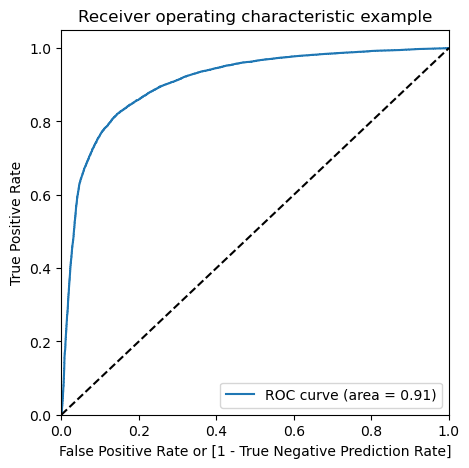

In [134]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_df.Churn, y_train_sm_pred_df.Churn_pred_prob)

#### Finding Optimal Cutoff Point

In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_df[i]= y_train_sm_pred_df.Churn_pred_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_df.head()

,Churn,Churn_pred_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.138850,0,1,1,0,0,0,0,0,0,0,0
1,0,0.342875,0,1,1,1,1,0,0,0,0,0,0
2,0,0.267675,0,1,1,1,0,0,0,0,0,0,0
3,0,0.353458,0,1,1,1,1,0,0,0,0,0,0
4,0,0.400444,0,1,1,1,1,1,0,0,0,0,0


In [136]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_df.Churn, y_train_sm_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.697688     0.975010     0.420365
0.2          0.2  0.757336     0.954687     0.559985
0.3          0.3  0.795235     0.928608     0.661862
0.4          0.4  0.819266     0.895686     0.742845
0.5          0.5  0.831838     0.855713     0.807964
0.6          0.6  0.837282     0.807290     0.867275
0.7          0.7  0.826265     0.739942     0.912588
0.8          0.8  0.795339     0.639983     0.950695
0.9          0.9  0.600244     0.211893     0.988594


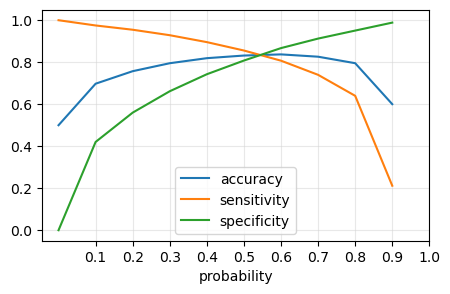

In [137]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.

ax = cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(5,3))
plt.xticks(ticks=np.arange(0.1, 1.1, 0.1))
plt.grid(True, color='lightgrey', alpha=0.5)
plt.show()

In [138]:
#### From the above graph, we can see the optimum cutoff is between 05 and 0.6. 
#### We need to explore the range 0.5-0.6 for the exact value.

In [139]:
# Creatying columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_df[i]= y_train_sm_pred_df.Churn_pred_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_df.head()

,Churn,Churn_pred_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.138850,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.342875,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.267675,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.353458,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.400444,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [140]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_df.Churn, y_train_sm_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.831838     0.855713     0.807964
0.51         0.51  0.832564     0.850788     0.814341
0.52         0.52  0.833705     0.846589     0.820821
0.53         0.53  0.834820     0.842078     0.827561
0.54         0.54  0.835182     0.837464     0.832901
0.55         0.55  0.836090     0.832694     0.839486
0.56         0.56  0.836919     0.828546     0.845292
0.57         0.57  0.837412     0.823880     0.850944
0.58         0.58  0.837904     0.819110     0.856698
0.59         0.59  0.837541     0.813563     0.861520


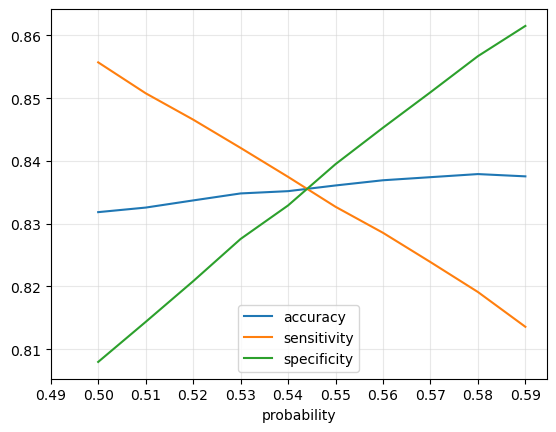

In [141]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(ticks=np.arange(0.49, 0.6, 0.01))
plt.grid(True, color='lightgrey', alpha=0.5)
plt.show()

#### From the above graph we can conclude that the optimal ___cutoff point___ in the probability to define that the predicted churn variabe converges at ___0.54___

In [142]:
#### Creating new column 'final_churn_pred' with 1 if Churn_pred_prob > 0.54 else 0

In [143]:
y_train_sm_pred_df['final_churn_pred'] = y_train_sm_pred_df.Churn_pred_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_df.head()

,Churn,Churn_pred_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.138850,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.342875,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.267675,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.353458,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.400444,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
# Calculating the ovearall accuracy with the final cut off results :

print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_df.Churn, y_train_sm_pred_df.final_churn_pred))

The overall accuracy of the model now is: 0.8351824968892576


In [145]:
# Confusion Matrix :

confusion2 = metrics.confusion_matrix(y_train_sm_pred_df.Churn, y_train_sm_pred_df.final_churn_pred )
print(confusion2)

[[16065  3223]
 [ 3135 16153]]


In [146]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Sensitivity
print("Sensitivity = ",(TP2 / float(TP2+FN2)).round(2))

# Specificity
print("Specificity = ",(TN2 / float(TN2+FP2)).round(2))

# False Positive Rate - predicting churn when customer does not have churned
print("False Positive Rate = ",(FP2/ float(TN2+FP2)).round(2))

# Precision 
print ("Precision = ",(TP2 / float(TP2+FP2)).round(2))

# Negative predictive value
print ("True Negative Prediction Rate = ",(TN2 / float(TN2 + FN2)).round(2))

Sensitivity =  0.84
Specificity =  0.83
False Positive Rate =  0.17
Precision =  0.83
True Negative Prediction Rate =  0.84


#### Precision and recall tradeoff

In [147]:
from sklearn.metrics import precision_recall_curve

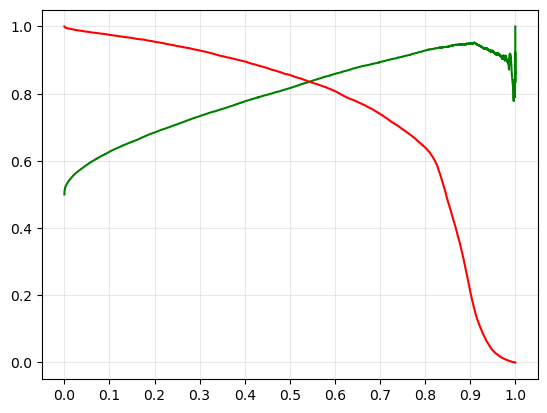

In [148]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_df.Churn, y_train_sm_pred_df.Churn_pred_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(ticks=np.arange(0.0, 1.1, 0.1))
plt.grid(True, color='lightgrey', alpha=0.5)
plt.show()

### Predictions on the Test set

**Transforming and feature selection for test data**

In [149]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,tenure,avg_arpu_6_7
35865,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000249,0.000000,0.000000,0.003565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001402,0.000000,0.000000,0.0,0.0,0.000000,0.004941,0.000000,0.000000,0.0,0.0,0.001493,0.001937,0.000162,0.003225,0.002280,0.002466,0.000077,0.000000,0.002178,0.000000,0.000041,0.000023,0.001853,0.000000,0.010098,0.0,0.0,0.0,0.0,0.018753,0.000000,0.000053,0.000000,0.000000,0.0,0.000000,0.0,0.016287,0.050725,0.010204,0.022444,0.006234,0.002248,0.004239,0.002494,0.000000,0.010932,0.016077,0.000000,0.008393,0.041051,0.000000,0.000000,0.000000,0.000000,0.5,0.5,0.0,0.00,0.0,0.0,0.02381,0.104167,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000161,0.011347,0.000000,0.014493,0.059622
41952,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.006489,0.004028,0.002058,0.000516,0.003132,0.005379,0.000000,0.001285,0.000409,0.000000,0.036826,0.0,0.010557,0.004741,0.018985,0.0,0.0,0.000000,0.020936,0.000000,0.000000,0.0,0.0,0.025150,0.049448,0.023064,0.002868,0.011624,0.005979,0.000000,0.000000,0.000000,0.003628,0.011922,0.005535,0.018785,0.038543,0.004938,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006005,0.000000,0.0,0.012541,0.0,0.009772,0.043478,0.020408,0.049875,0.037406,0.032592,0.049875,0.021446,0.011238,0.097749,0.093248,0.093248,0.002835,0.002872,0.004586,0.001774,0.029730,0.009727,0.5,0.5,0.5,0.00,0.0,0.0,0.02381,0.000000,0.000000,0.000000,0.071429,0.0625,0.034483,0.0,0.0,0.019572,0.057999,0.000000,0.005755,0.002633,0.001627,0.275362,0.075152
98938,0.061230,0.003275,0.037889,0.008157,0.010851,0.025458,0.018789,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.003757,0.041765,0.008157,0.018946,0.054062,0.073716,0.001375,0.001002,0.001831,0.000000,0.000000,0.0,0.000024,0.000000,0.002075,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.022291,0.025701,0.046670,0.055421,0.242001,0.180698,0.016391,0.003696,0.002537,0.008482,0.002950,0.000053,0.007622,0.009449,0.003870,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001317,0.000000,0.003346,0.0,0.000000,0.0,0.022801,0.079710,0.035714,0.062843,0.062843,0.056642,0.062843,0.007481,0.029220,0.162058,0.162058,0.162058,0.005709,0.025395,0.056568,0.036847,0.026894,0.052959,0.5,0.5,0.5,0.00,0.0,0.0,0.00000,0.000000,0.000000,0.142857,0.071429,0.1250,0.000000,0.0,0.0,0.211621,0.094771,0.068273,0.0095

In [150]:
# Feature selection
X_test=X_test[rfe_columns_3]
X_test.head()

,onnet_mou_8,offnet_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2m_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,vbc_3g_8,avg_arpu_6_7
35865,0.000070,0.000000,0.000000,0.000000,0.000000,0.000162,0.002466,0.002178,0.010098,0.000000,0.010204,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.059622
41952,0.002058,0.007510,0.000000,0.002058,0.005379,0.023064,0.005979,0.000000,0.004938,0.000000,0.020408,0.011238,0.093248,0.004586,0.0,0.000000,0.019572,0.075152
98938,0.008157,0.018789,0.000000,0.008157,0.073716,0.046670,0.180698,0.002537,0.003870,0.000000,0.035714,0.029220,0.162058,0.056568,0.0,0.000000,0.211621,0.095894
29459,0.000297,0.000573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000126,0.000000,0.000000,0.025510,0.034615,0.099035,0.008221,0.2,0.058824,0.068735,0.070960
70682,0.039505,0.135335,0.031491,0.004256,0.041749,0.012298,0.068991,0.001958,0.000733,0.080257,0.061224,0.029220,0.014791,0.000000,0.0,0.029412,0.000000,0.101081


In [151]:
# Adding constant to the test model.
X_test_sm = sm.add_constant(X_test)

In [152]:
y_test_pred = res.predict(X_test_sm)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 35865    0.785402
41952    0.494697
98938    0.000258
29459    0.196751
70682    0.006898
58317    0.190829
4860     0.007433
16890    0.786427
61329    0.742096
94332    0.532540
dtype: float64


In [153]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
35865,0.785402
41952,0.494697
98938,0.000258
29459,0.196751
70682,0.006898


In [154]:
y_test_pred=y_test_pred.rename(columns = {0:"Conv_prob"})

In [155]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [156]:
y_test_pred_final = pd.concat([y_test_df,y_test_pred],axis=1)
y_test_pred_final.head()

,churn,Conv_prob
35865,0,0.785402
41952,0,0.494697
98938,0,0.000258
29459,0,0.196751
70682,0,0.006898


In [157]:
y_test_pred_final['test_churn_pred'] = y_test_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_test_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.785402,1
41952,0,0.494697,0
98938,0,0.000258,0
29459,0,0.196751,0
70682,0,0.006898,0


### Evaluation Metrics

In [158]:
# Checking the overall accuracy of the predicted set.
accu_logreg = round(metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.test_churn_pred),2)
print('Accuracy = ',accu_logreg)

Accuracy =  0.82


In [159]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6832 1440]
 [ 152  577]]


In [160]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [161]:
sen_logreg = (TP3 / float(TP3+FN3)).round(2)
print("Sensitivity = ",sen_logreg)

speci_logreg = (TN3 / float(TN3+FP3)).round(2) 
print("Specificity = ",speci_logreg)

fpr_logreg = (FP3/ float(TN3+FP3)).round(2)
print("False Positive Rate = ", fpr_logreg)

prec_logreg = (TP3 / float(TP3+FP3)).round(2)
print ("Precision = ", prec_logreg)

tnpr_logreg = (TN3 / float(TN3+FN3)).round(2)
print ("True Negative Prediction Rate = ", tnpr_logreg)

Sensitivity =  0.79
Specificity =  0.83
False Positive Rate =  0.17
Precision =  0.29
True Negative Prediction Rate =  0.98


### ROC Curve (Test set)

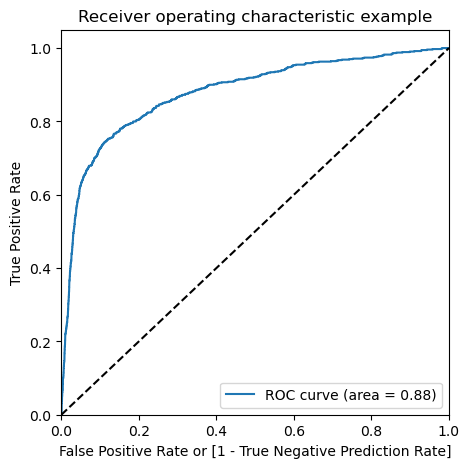

In [162]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final.churn,y_test_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_test_pred_final.churn,y_test_pred_final.Conv_prob)

#### The AUC score for train dataset is 0.91 and the test dataset is 0.88.
#### This model can be considered as a good model.

### F-1 Score

In [163]:
from sklearn.metrics import f1_score

In [164]:
f1_logreg = f1_score(y_test,y_test_pred_final['test_churn_pred'])
print('F-1 Score = ' , f1_logreg.round(2))

F-1 Score =  0.42


### Creating a Table of Evaluation Metrics for comparison :

In [165]:
metrics_cols = ['Accuracy', 'Precision', 'Sensitivity(Recall)', 'Specificity', 'False Positive Rate', 
           'True Negative Prediction Rate', 'F-1 Score']

In [166]:
logreg_values = [accu_logreg, prec_logreg, sen_logreg, speci_logreg, fpr_logreg, tnpr_logreg, f1_logreg]

In [167]:
metrics = pd.DataFrame({
    'Metrics': metrics_cols,
    'Logistic Regression': logreg_values})

In [168]:
metrics.set_index('Metrics', inplace=True)

In [169]:
metrics = metrics.round(2)

In [170]:
metrics

,Logistic Regression
Metrics,
Accuracy,0.82
Precision,0.29
Sensitivity(Recall),0.79
Specificity,0.83
False Positive Rate,0.17
True Negative Prediction Rate,0.98
F-1 Score,0.42


### Classification Report - Test data

In [171]:
#check the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_pred_final.churn,y_test_pred_final.test_churn_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8272
           1       0.29      0.79      0.42       729

    accuracy                           0.82      9001
   macro avg       0.63      0.81      0.66      9001
weighted avg       0.92      0.82      0.86      9001



### Feature Importance

In [172]:
#Create a Feature importance dataframe
feature_names = X_train_sm.columns
# Get the coefficients of the model
coefficients = res.params 
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})
# Taking the absolute value of the coefficients to rank their importance
feature_importance['Abs_Importance'] = np.abs(feature_importance['Importance'])

# Sorting the DataFrame by absolute importance (highest to lowest)
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance)

                               Feature  Importance  Abs_Importance
loc_ic_t2m_mou_8      loc_ic_t2m_mou_8  -28.078407       28.078407
spl_ic_mou_8              spl_ic_mou_8  -25.096771       25.096771
loc_ic_t2t_mou_8      loc_ic_t2t_mou_8  -24.522223       24.522223
avg_arpu_6_7              avg_arpu_6_7   24.108849       24.108849
last_day_rch_amt_8  last_day_rch_amt_8  -19.395182       19.395182
loc_og_t2t_mou_8      loc_og_t2t_mou_8  -17.008375       17.008375
std_ic_t2m_mou_8      std_ic_t2m_mou_8  -15.845309       15.845309
loc_ic_t2f_mou_8      loc_ic_t2f_mou_8  -13.372465       13.372465
total_rech_num_8      total_rech_num_8  -12.291804       12.291804
loc_og_t2m_mou_8      loc_og_t2m_mou_8   -9.481907        9.481907
offnet_mou_8              offnet_mou_8   -8.843923        8.843923
onnet_mou_8                onnet_mou_8   -7.711996        7.711996
vol_2g_mb_8                vol_2g_mb_8   -7.626813        7.626813
sachet_2g_8                sachet_2g_8   -6.181666        6.18

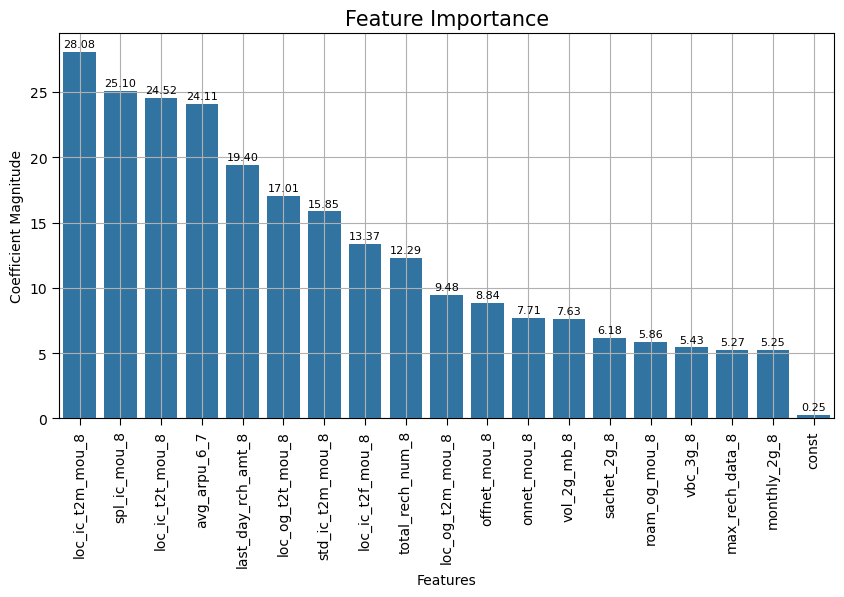

In [173]:
#Plot to show the feature importance
plt.figure(figsize=[10,5])
ax = sns.barplot(x = "Feature",y="Abs_Importance",data=feature_importance)
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', fontsize=8, padding=2)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=10)
plt.xlabel("Features",size=10)
plt.tick_params(size=5,labelsize = 10) # Tick size in both X and Y axes
plt.grid(0.3)

## DECISION TREE

#### Test-Train Split

In [174]:
X.shape, y.shape

((30001, 104), (30001,))

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [176]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((21000, 104), (9001, 104), (21000,), (9001,))

### Handling imbalance - Oversmapling using SMOTE

In [177]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=48)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [178]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38618, 104)
Dimension of y_train_sm Shape: (38618,)


#### Decision tree modeling

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [181]:
dt_base.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=4, random_state=42)

#### Predictions on the train and test data

In [182]:
y_train_sm_pred = dt_base.predict(X_train_sm)
y_test_pred = dt_base.predict(X_test)

In [183]:
from sklearn.metrics import classification_report

#### Classification report on ___Train Data___

In [184]:
print(classification_report(y_train_sm, y_train_sm_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     19309
           1       0.89      0.84      0.86     19309

    accuracy                           0.87     38618
   macro avg       0.87      0.87      0.87     38618
weighted avg       0.87      0.87      0.87     38618



#### Classification report on ___Test Data___

In [185]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8251
           1       0.39      0.71      0.51       750

    accuracy                           0.88      9001
   macro avg       0.68      0.81      0.72      9001
weighted avg       0.92      0.88      0.90      9001



#### Plot the ROC curve on Train data

In [186]:
# from sklearn.metrics import plot_roc_curve   
from sklearn.metrics import RocCurveDisplay

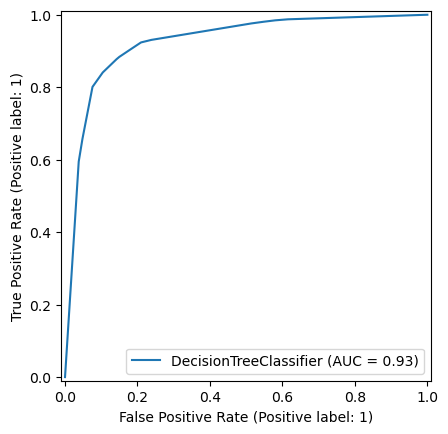

In [187]:
RocCurveDisplay.from_estimator(dt_base, X_train_sm, y_train_sm)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
dt = DecisionTreeClassifier(random_state=42)

In [190]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [191]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [192]:
%%time
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 27.1 s
Wall time: 1min 1s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [193]:
grid_search.best_score_

0.9142890677192648

In [194]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

### Prediction with the best estimator:

In [195]:
y_train_pred_dtbest = dt_best.predict(X_train_sm)
y_test_pred_dtbest = dt_best.predict(X_test)

### Classification report for Train dataset with the Best Estimator (decision Tree)

In [196]:
print(classification_report(y_train_sm, y_train_pred_dtbest))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     19309
           1       0.93      0.96      0.95     19309

    accuracy                           0.94     38618
   macro avg       0.94      0.94      0.94     38618
weighted avg       0.94      0.94      0.94     38618



### Classification report for Test dataset with the Best Estimator (decision Tree)

In [197]:
print(classification_report(y_test, y_test_pred_dtbest))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      8251
           1       0.40      0.71      0.51       750

    accuracy                           0.89      9001
   macro avg       0.69      0.80      0.72      9001
weighted avg       0.92      0.89      0.90      9001



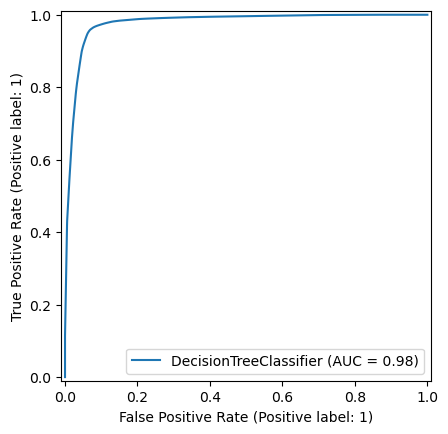

In [198]:
# plot_roc_curve(dt_best, X_train, y_train)
RocCurveDisplay.from_estimator(dt_best, X_train_sm, y_train_sm)
plt.show()

### Confusion Matrix - Decision Tree

In [199]:
# Generate the confusion matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dtbest)

print(cm_dt)

[[7454  797]
 [ 221  529]]


In [200]:
TP = cm_dt[1,1] # true positive 
TN = cm_dt[0,0] # true negatives
FP = cm_dt[0,1] # false positives
FN = cm_dt[1,0] # false negatives

In [201]:
accu_dt = ((TP+TN)/(TP+TN+FP+FN)).round(2)
print('Accuracy = ' , accu_dt)

sen_dt = (TP / float(TP+FN)).round(2)
print("Sensitivity = ",sen_dt)

speci_dt = (TN / float(TN+FP)).round(2) 
print("Specificity = ",speci_dt)

fpr_dt = (FP/ float(TN+FP)).round(2)
print("False Positive Rate = ", fpr_dt)

prec_dt = (TP / float(TP+FP)).round(2)
print ("Precision = ", prec_dt)

tnpr_dt = (TN / float(TN+FN)).round(2)
print ("True Negative Prediction Rate = ", tnpr_dt)

f1_dt = ((2 * prec_dt * sen_dt)/(prec_dt + sen_dt)).round(2)
print ('F-1 Sscore = ',f1_dt) 

Accuracy =  0.89
Sensitivity =  0.71
Specificity =  0.9
False Positive Rate =  0.1
Precision =  0.4
True Negative Prediction Rate =  0.97
F-1 Sscore =  0.51


In [202]:
dt_values = [accu_dt, prec_dt, sen_dt, speci_dt, fpr_dt, tnpr_dt, f1_dt]

In [203]:
dt_values

[0.89, 0.4, 0.71, 0.9, 0.1, 0.97, 0.51]

In [204]:
metrics['Decision Trees'] = dt_values

In [205]:
metrics

,Logistic Regression,Decision Trees
Metrics,,
Accuracy,0.82,0.89
Precision,0.29,0.40
Sensitivity(Recall),0.79,0.71
Specificity,0.83,0.90
False Positive Rate,0.17,0.10
True Negative Prediction Rate,0.98,0.97
F-1 Score,0.42,0.51


## Using Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [208]:
%%time
rf.fit(X_train_sm, y_train_sm)

CPU times: total: 641 ms
Wall time: 1.09 s


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [209]:
round(rf.oob_score_,2)

0.85

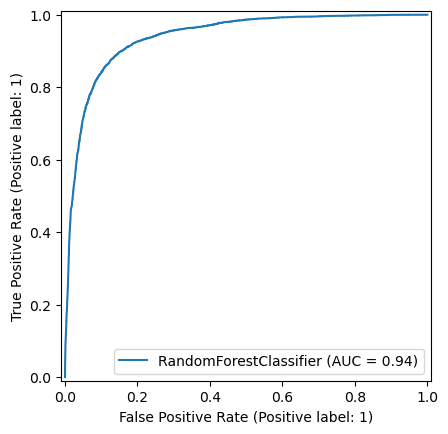

In [210]:
# plot_roc_curve(rf, X_train, y_train)
RocCurveDisplay.from_estimator(rf, X_train_sm, y_train_sm)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [211]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [212]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [213]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [214]:
%%time
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 2min 10s
Wall time: 9min 18s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [215]:
round(grid_search.best_score_,4)

0.9495

In [216]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

### Prediction using Best Estimator (Random Forest)

In [217]:
y_train_pred_rfbest = rf_best.predict(X_train_sm)
y_test_pred_rfbest = rf_best.predict(X_test)

### Classification report on Train Set with the Best Estimator (Random Forest)

In [218]:
print(classification_report(y_train_sm, y_train_pred_rfbest))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19309
           1       0.97      0.99      0.98     19309

    accuracy                           0.98     38618
   macro avg       0.98      0.98      0.98     38618
weighted avg       0.98      0.98      0.98     38618



### Classification report on Test Set with the Best Estimator (Random Forest)

In [219]:
print(classification_report(y_test, y_test_pred_rfbest))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8251
           1       0.55      0.68      0.61       750

    accuracy                           0.93      9001
   macro avg       0.76      0.81      0.78      9001
weighted avg       0.94      0.93      0.93      9001



### ROC Curve

#### ROC Curve for Train Data

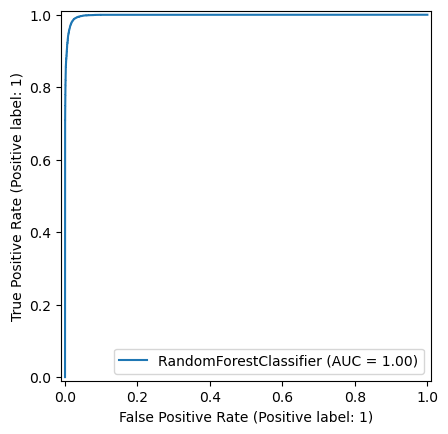

In [220]:
# plot_roc_curve(rf_best, X_train, y_train)
RocCurveDisplay.from_estimator(rf_best, X_train_sm, y_train_sm)
plt.show()

### ROC Curve for test data

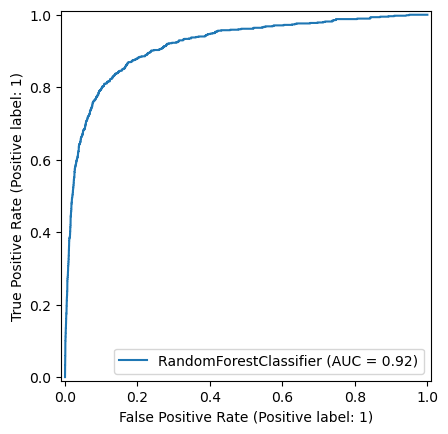

In [221]:
# plot_roc_curve(rf_best, X_train, y_train)
RocCurveDisplay.from_estimator(rf_best, X_test, y_test)
plt.show()

### Evaluation Metrics

#### Confusion Matrix for the Random Forests Model

In [222]:
# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rfbest)

print(cm_rf)

[[7827  424]
 [ 239  511]]


In [223]:
TP = cm_rf[1,1] # true positive 
TN = cm_rf[0,0] # true negatives
FP = cm_rf[0,1] # false positives
FN = cm_rf[1,0] # false negatives

In [224]:
accu_rf = ((TP+TN)/(TP+TN+FP+FN)).round(2)
print('Accuracy = ' , accu_rf)

sen_rf = (TP / float(TP+FN)).round(2)
print("Sensitivity = ",sen_rf)

speci_rf = (TN / float(TN+FP)).round(2) 
print("Specificity = ",speci_rf)

fpr_rf = (FP/ float(TN+FP)).round(2)
print("False Positive Rate = ", fpr_rf)

prec_rf = (TP / float(TP+FP)).round(2)
print ("Precision = ", prec_rf)

tnpr_rf = (TN / float(TN+FN)).round(2)
print ("True Negative Prediction Rate = ", tnpr_rf)

f1_rf = ((2 * prec_rf * sen_rf)/(prec_rf + sen_rf)).round(2)
print ('F-1 Sscore = ',f1_rf) 

Accuracy =  0.93
Sensitivity =  0.68
Specificity =  0.95
False Positive Rate =  0.05
Precision =  0.55
True Negative Prediction Rate =  0.97
F-1 Sscore =  0.61


In [225]:
rf_values = [accu_rf, prec_rf, sen_rf, speci_rf, fpr_rf, tnpr_rf, f1_rf]

In [226]:
rf_values

[0.93, 0.55, 0.68, 0.95, 0.05, 0.97, 0.61]

In [227]:
metrics['Random Forests'] = rf_values

In [228]:
metrics

,Logistic Regression,Decision Trees,Random Forests
Metrics,,,
Accuracy,0.82,0.89,0.93
Precision,0.29,0.40,0.55
Sensitivity(Recall),0.79,0.71,0.68
Specificity,0.83,0.90,0.95
False Positive Rate,0.17,0.10,0.05
True Negative Prediction Rate,0.98,0.97,0.97
F-1 Score,0.42,0.51,0.61


### Feature Importance

In [229]:
rf_best.feature_importances_

array([5.86671687e-02, 4.61490222e-03, 4.78343196e-03, 1.48021053e-02,
       5.03594680e-03, 4.86166731e-03, 2.65653678e-02, 2.75845752e-03,
       4.34644934e-03, 6.62013089e-02, 2.59680239e-03, 8.52528726e-03,
       7.47455042e-02, 3.63719329e-03, 4.27962973e-03, 2.39845631e-02,
       4.42715447e-03, 6.00637769e-03, 3.65123897e-02, 2.46081368e-03,
       3.27098980e-03, 8.99835447e-03, 1.81835290e-03, 3.76156519e-03,
       2.09897601e-03, 5.63852598e-03, 6.61104560e-04, 1.16428513e-03,
       1.11464190e-03, 8.79433697e-04, 4.36446507e-03, 7.10097826e-03,
       3.83268974e-03, 2.84215805e-03, 1.29348244e-04, 7.88820901e-05,
       3.95938288e-03, 3.88056164e-03, 3.96773415e-02, 6.82869342e-03,
       8.49202394e-03, 7.70969680e-02, 3.49966222e-03, 3.28656871e-03,
       7.59963374e-03, 3.77058619e-03, 4.40293795e-03, 4.21028350e-03,
       3.97006585e-03, 4.77650553e-03, 1.06947825e-02, 1.19854966e-03,
       1.18107433e-03, 2.68485879e-03, 6.67470820e-03, 1.24180257e-03,
      

In [230]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [231]:
imp_df = imp_df.sort_values(by="Imp", ascending=False)

In [232]:
imp_df

,Varname,Imp
41,loc_ic_t2m_mou_8,0.077097
12,roam_og_mou_8,0.074746
83,night_pck_user_8,0.070416
9,roam_ic_mou_8,0.066201
0,arpu_8,0.058667
68,max_rech_amt_8,0.041866
74,max_rech_data_8,0.040133
38,loc_ic_t2t_mou_8,0.039677
18,loc_og_t2m_mou_8,0.036512
71,last_day_rch_amt_8,0.028887


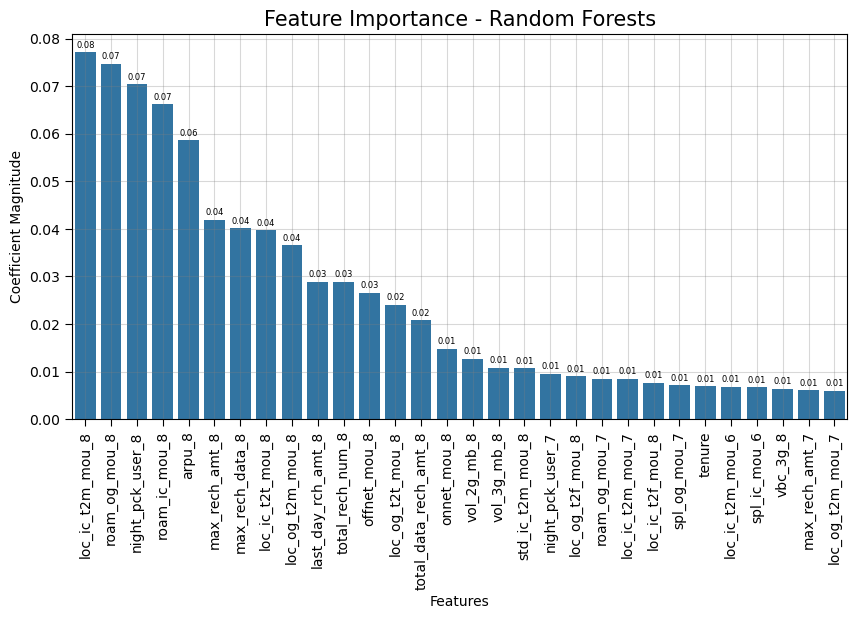

In [233]:
#Plot to show the feature importance
plt.figure(figsize=[10,5])
ax = sns.barplot(x = "Varname",y="Imp",data=imp_df.head(30))
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', color = 'black', fontsize=6, padding=2)
plt.title("Feature Importance - Random Forests",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=10)
plt.xlabel("Features",size=10)
plt.tick_params(size=5,labelsize = 10) # Tick size in both X and Y axes
plt.grid(0.3, color='grey', alpha = 0.3)

## Summary of Comparison for 3 models:

### 1. **Accuracy**
- **Random Forests** shows the highest accuracy at 0.93, followed by **Decision Trees** at 0.89, and **Logistic Regression** at 0.82.
- However, since accuracy can be misleading in imbalanced datasets (which is the case here), we need to look at the other metrics for a better understanding.

### 2. **Precision**
- **Random Forests** has the highest precision (0.55), which means it is better at correctly identifying actual churners (positive class) compared to the other models.
- **Decision Trees** follows with 0.40 precision, while **Logistic Regression** has the lowest precision at 0.29. Low precision in Logistic Regression means that a significant number of non-churners are being misclassified as churners.

### 3. **Sensitivity (Recall)**
- **Logistic Regression** performs the best in terms of recall (0.79), meaning it is good at identifying actual churners, even if it misclassifies some.
- **Decision Trees** and **Random Forests** have lower recall (0.71 and 0.68, respectively), meaning they miss a higher proportion of actual churners compared to Logistic Regression.

### 4. **Specificity**
- **Random Forests** has the highest specificity at 0.95, followed by **Decision Trees** (0.90) and **Logistic Regression** (0.83). High specificity means that Random Forests and Decision Trees are better at identifying non-churners.
  
### 5. **False Positive Rate (FPR)**
- **Random Forests** has the lowest FPR (0.05), which is a positive sign as it misclassifies fewer non-churners as churners.
- **Logistic Regression** has the highest FPR (0.17), indicating more false positives, which could be costly in business settings.
  
### 6. **True Negative Prediction Rate**
- All three models perform similarly in terms of predicting non-churners correctly, with **Logistic Regression** being marginally better (0.98).
  
### 7. **F1-Score**
- **Random Forests** has the highest F1-score at 0.61, followed by **Decision Trees** at 0.51, and **Logistic Regression** at 0.42.
  - The F1 score balances precision and recall, making **Random Forests** the most balanced model overall for churn prediction, with better precision and a reasonable recall.

### **Summary**
- **Random Forests** performs the best overall, with the highest accuracy, precision, and F1-score. It is more reliable in minimizing false positives while also correctly identifying non-churners.
- **Logistic Regression** performs well in terms of recall (sensitivity), making it better at identifying actual churners but at the cost of low precision and higher false positives.
- **Decision Trees** is a middle-ground model, with fairly balanced metrics, but it is outperformed by Random Forests in almost every category.
- If identifying all possible churners is the priority (to avoid false negatives), **Logistic Regression** may be more useful.
- However, if we are looking for a more balanced model with good performance across both precision and recall, **Random Forests** is likely the best choice for your telecom churn prediction case.

### **Insights and Recommendations**

The **Top features** which indicate that the customer is going to churn are -
1. Local incoming and outgoing MOU (other operators , within same operator, fixed line) during action phase.
2. Roaming incoming and Outgoing MOU
3. Special incoming MOU during action phase.
4. Average revenue per user.
5. Last day recharge amount.
6. STD incoming MOU (other operator)
7. Offnet MOU and Onnet MOU
8. Night pack user or not
9. Max recharge amount for calls and data.
10. Volume of 2G and 3G usage.

**Insights** 
1. Age on Network - Churn possibility is higher for users with less than 12 months. High value users with less than 12 months on network need to be carefully monitored. Special offers can be roilled out which will motivate the user to move on to second year.
2. Average revenue per user(ARPU) : A sudden sharp reduction in ARPU in subsequent months is a clear indicator of churn. Customers to be contacted and steps to be taken to retain the customer when such a behaviour is observed.
3. Similerly a suddent reduction in Minutes of usage (MOU)- calls within same network, calls outside network, local, incoming, outgoing, roaming - are also  strong indicators of possibility to churn.
4. Similarly - Sudden reduction Recharge amount for talk time and data also indicate possibility to churn.
5. Sudden reduction in the usage of 3g data services and usage of services with validity less than a month (for example 3g Sachets) indicate possibility to churn.
6. Users who are using more Roaminng in Outgoing and Incoming calls, are very likely to churn.Compnay can focus on them to retain them.